# WORK AND MENTAL HEALTH


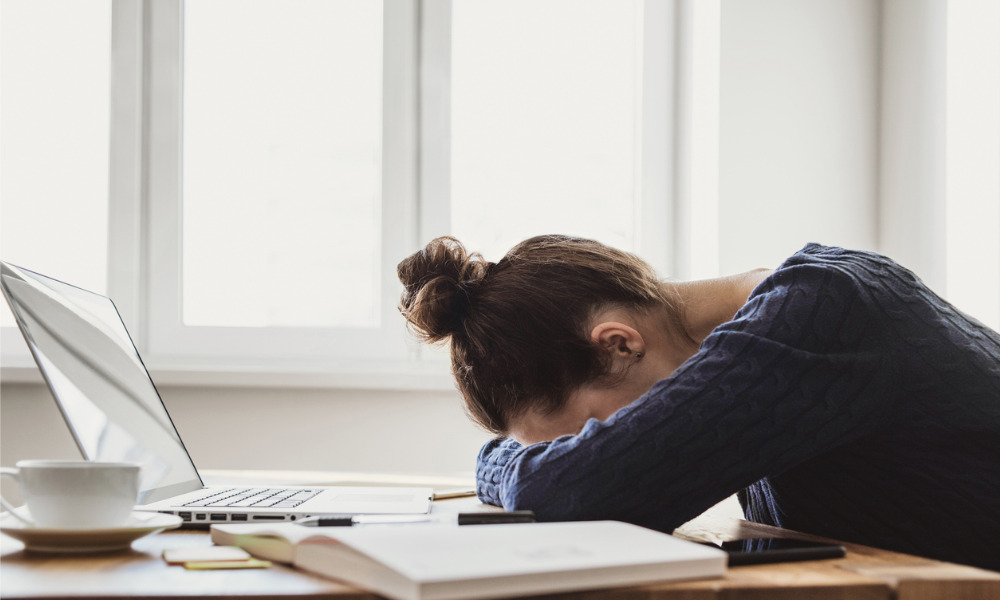

## ABOUT DATA
**This dataset examines the impact of remote work on mental health, gathering responses from individuals across various demographics. It includes key metrics such as job satisfaction, anxiety levels, and work-life balance.**

**Key Features:**
**Diverse Respondents: Data from different age groups and professions.
Mental Health Insights: Explore the effects of work conditions.**

## GROUP MEMBERS
1. ERIC INKOOM AYITEY
2. LADY PEARL AMPOMAH OPOKU
3. NANA DANSOA BEDIAKO
4. RITA ACQUAH
5. HILLARY OWUSU

## OBJECTIVES
1. Identify if There Are Key Predictors of Mental Health Conditions
Objective:  
Determine which factors are most strongly associated with employees reporting a Mental_Health_Condition
2. Assess the Impact of Workload on Mental Health
Objective:
Evaluate how workload intensity (e.g., long hours or frequent virtual meetings) influences mental health.
3. Examine the Role of Organizational Support
Objective:  
Determine how access to resources relate to mental health outcomes.
4. Regional or Industry-Based Mental Health Trends
Objective:  
Understand how mental health conditions vary across locations or sectors.


In [6]:
# importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import  LogisticRegression
from sklearn.tree import  DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import LinearSegmentedColormap
from sklearn.model_selection import GridSearchCV
import joblib
import warnings
warnings.filterwarnings('ignore')

In [7]:
# loading dataset 
data = pd.read_csv("Messy_WAMH_data.csv")
data

Employee_ID   Age      Gender           Job_Role    Industry  \
0        EMP0001  32.0         NaN                 HR         NaN   
1        EMP0002  40.0       Feale     Data Scientist          It   
2        EMP0003  59.0  Non-binary  Software Engineer   Education   
3        EMP0004  27.0        male  Software Engineer     Finance   
4        EMP0005  49.0        Male              Sales  Consulting   
...          ...   ...         ...                ...         ...   
4997     EMP4998  42.0      Female              Sales  Healthcare   
4998     EMP4999  27.0      Female              Sales  Healthcare   
4999     EMP5000  29.0        Male                 HR          It   
5000     EMP0001  32.0         NaN                 HR         NaN   
5001     EMP0002  40.0       Feale     Data Scientist          It   

      Years_of_Experience Work_Location  Hours_Worked_Per_Week  \
0                    13.0        Hybrid                   47.0   
1                     3.0        Remote                   52.0   
2                     NaN       On Site                   46.0   
3                    20.0        Onsite                   32.0   
4                    32.0        Onsite                   35.0   
...                   ...           ...                    ...   
4997                 21.0        Hybrid                   34.0   
4998                 26.0        Remote                   58.0   
4999                 30.0        Onsite                    NaN   
5000                 13.0        Hybrid                   47.0   
5001                  3.0        Remote                   52.0   

      Number_of_Virtual_Meetings  Work_Life_Balance_Rating Stress_Level  \
0                            7.0                       2.0       Medium   
1                            4.0                       NaN       Medium   
2                           11.0                       5.0       Medium   
3                            8.0                       4.0         High   
4                           12.0                       2.0          NaN   
...                          ...                       ...          ...   
4997                         1.0                       4.0         High   
4998                         0.0                       5.0          Low   
4999                        15.0                       1.0          Low   
5000                         7.0                       2.0       Medium   
5001                         4.0                       NaN       Medium   

     Mental_Health_Condition Access_to_Mental_Health_Resources  \
0                 Depression                                No   
1                    Anxiety                                No   
2                    Anxiety                                No   
3                 Depression                               NaN   
4                  depresion                               NaN   
...                      ...                               ...   
4997                 Burnout                                No   
4998                     NaN                               Yes   
4999                     NaN                               Yes   
5000              Depression                                No   
5001                 Anxiety                                No   

     Productivity_Change  Social_Isolation_Rating  \
0               Decrease                      1.0   
1               Increase                      3.0   
2              No Change                      NaN   
3               Increase                      3.0   
4               Decrease                      3.0   
...                  ...                      ...   
4997            Increase                      3.0   
4998            Increase                      3.0   
4999           No Change                      NaN   
5000            Decrease                      1.0   
5001            Increase                      3.0   

     Satisfaction_with_Remote_Work  Company_Support_

### DATA CLEANING

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5002 entries, 0 to 5001
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Employee_ID                        4502 non-null   object 
 1   Age                                4502 non-null   float64
 2   Gender                             4501 non-null   object 
 3   Job_Role                           4502 non-null   object 
 4   Industry                           4501 non-null   object 
 5   Years_of_Experience                4502 non-null   float64
 6   Work_Location                      4502 non-null   object 
 7   Hours_Worked_Per_Week              4502 non-null   float64
 8   Number_of_Virtual_Meetings         4502 non-null   float64
 9   Work_Life_Balance_Rating           4501 non-null   float64
 10  Stress_Level                       4500 non-null   object 
 11  Mental_Health_Condition            3420 non-null   objec

In [10]:
# finding the number of null values present in each column
data.isnull().sum()

Employee_ID                           500
Age                                   500
Gender                                501
Job_Role                              500
Industry                              501
Years_of_Experience                   500
Work_Location                         500
Hours_Worked_Per_Week                 500
Number_of_Virtual_Meetings            500
Work_Life_Balance_Rating              501
Stress_Level                          502
Mental_Health_Condition              1582
Access_to_Mental_Health_Resources     500
Productivity_Change                   500
Social_Isolation_Rating               500
Satisfaction_with_Remote_Work         500
Company_Support_for_Remote_Work       500
Physical_Activity                    1978
Sleep_Quality                         498
Region                                500
dtype: int64

In [11]:
# viewing datatypes of data
print(data["Age"].describe())
print(data["Years_of_Experience"].describe())
print(data["Hours_Worked_Per_Week"].describe())
print(data["Number_of_Virtual_Meetings"].describe())


count    4502.000000
mean       40.926477
std        11.313519
min        22.000000
25%        31.000000
50%        41.000000
75%        51.000000
max        60.000000
Name: Age, dtype: float64
count    4502.000000
mean       17.848068
std         9.993734
min         1.000000
25%         9.000000
50%        18.000000
75%        26.000000
max        35.000000
Name: Years_of_Experience, dtype: float64
count    4502.000000
mean       39.584851
std        11.882928
min        20.000000
25%        29.000000
50%        39.000000
75%        50.000000
max        60.000000
Name: Hours_Worked_Per_Week, dtype: float64
count    4502.000000
mean        7.560862
std         4.625855
min         0.000000
25%         4.000000
50%         8.000000
75%        12.000000
max        15.000000
Name: Number_of_Virtual_Meetings, dtype: float64


In [12]:
# filling null values of numerical columns with the median values
data = data.copy()

data = data[np.isfinite(data['Age'])]  # Removes inf and -inf
data.fillna({"Age": data["Age"].median()}, inplace=True)
data['Age'] = data['Age'].astype(int)

data = data[np.isfinite(data['Years_of_Experience'])]  # Removes inf and -inf
data.fillna({"Years_of_Experience" : data["Years_of_Experience"].median()}, inplace=True)
data['Years_of_Experience'] = data['Years_of_Experience'].astype(int)

data = data[np.isfinite(data['Hours_Worked_Per_Week'])] 
data.fillna({"Hours_Worked_Per_Week": data["Hours_Worked_Per_Week"].median()}, inplace=True)
data['Hours_Worked_Per_Week'] = data['Hours_Worked_Per_Week'].astype(int)

data = data[np.isfinite(data['Number_of_Virtual_Meetings'])] 
data.fillna({"Number_of_Virtual_Meetings": data["Number_of_Virtual_Meetings"].median()}, inplace=True)
data['Number_of_Virtual_Meetings'] = data['Number_of_Virtual_Meetings'].astype(int)


In [13]:
# replacing empty(NaN) values of categorical columns 
data["Employee_ID"] = data["Employee_ID"].fillna("Unknown")
data["Gender"] = data["Gender"].fillna("Unknown")
data["Job_Role"] = data["Job_Role"].fillna("Unknown")
data["Industry"] = data["Industry"].fillna("Unknown")
data["Work_Location"] = data["Work_Location"].fillna("Unknown")
data["Work_Life_Balance_Rating"] = data["Work_Life_Balance_Rating"].fillna("N/A")
data["Stress_Level"] = data["Stress_Level"].fillna("N/A")
data["Mental_Health_Condition"] = data["Mental_Health_Condition"].fillna("Unknown")
data["Access_to_Mental_Health_Resources"] = data["Access_to_Mental_Health_Resources"].fillna("Unknown")
data["Productivity_Change"] = data["Productivity_Change"].fillna("N/A")
data["Social_Isolation_Rating"] = data["Social_Isolation_Rating"].fillna("N/A")
data["Satisfaction_with_Remote_Work"] = data["Satisfaction_with_Remote_Work"].fillna("N/A")
data["Company_Support_for_Remote_Work"] = data["Company_Support_for_Remote_Work"].fillna("N/A")
data["Physical_Activity"] = data["Physical_Activity"].fillna("Unknown")
data["Sleep_Quality"] = data["Sleep_Quality"].fillna("Unknown")
data["Region"] = data["Region"].fillna("Unknown")

In [14]:
# First, create an explicit copy to avoid chained assignment issues
data["Gender"] = data["Gender"].astype("category")
data["Job_Role"] = data["Job_Role"].astype("category")
data["Industry"] = data["Industry"].astype("category")
data["Years_of_Experience"] = data["Years_of_Experience"].astype("int64")
data["Work_Location"] = data["Work_Location"].astype("category")
data["Hours_Worked_Per_Week"] = data["Hours_Worked_Per_Week"].astype("int64")
data["Number_of_Virtual_Meetings"] = data["Number_of_Virtual_Meetings"].astype("int64")
data["Work_Life_Balance_Rating"] = data["Work_Life_Balance_Rating"].astype("category")
data["Stress_Level"] = data["Stress_Level"].astype("category")
data["Mental_Health_Condition"] = data["Mental_Health_Condition"].astype("category")
data["Access_to_Mental_Health_Resources"] = data["Access_to_Mental_Health_Resources"].astype("category")
data["Productivity_Change"] = data["Productivity_Change"].astype("category")
data["Social_Isolation_Rating"] = data["Social_Isolation_Rating"].astype("category")
data["Company_Support_for_Remote_Work"] = data["Company_Support_for_Remote_Work"].astype("category")
data["Physical_Activity"] = data["Physical_Activity"].astype("category")
data["Sleep_Quality"] = data["Sleep_Quality"].astype("category")
data["Region"] = data["Region"].astype("category")

In [15]:
# checking for null values
data.isnull().sum()

Employee_ID                          0
Age                                  0
Gender                               0
Job_Role                             0
Industry                             0
Years_of_Experience                  0
Work_Location                        0
Hours_Worked_Per_Week                0
Number_of_Virtual_Meetings           0
Work_Life_Balance_Rating             0
Stress_Level                         0
Mental_Health_Condition              0
Access_to_Mental_Health_Resources    0
Productivity_Change                  0
Social_Isolation_Rating              0
Satisfaction_with_Remote_Work        0
Company_Support_for_Remote_Work      0
Physical_Activity                    0
Sleep_Quality                        0
Region                               0
dtype: int64

In [16]:
# the information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3267 entries, 0 to 5001
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Employee_ID                        3267 non-null   object  
 1   Age                                3267 non-null   int32   
 2   Gender                             3267 non-null   category
 3   Job_Role                           3267 non-null   category
 4   Industry                           3267 non-null   category
 5   Years_of_Experience                3267 non-null   int64   
 6   Work_Location                      3267 non-null   category
 7   Hours_Worked_Per_Week              3267 non-null   int64   
 8   Number_of_Virtual_Meetings         3267 non-null   int64   
 9   Work_Life_Balance_Rating           3267 non-null   category
 10  Stress_Level                       3267 non-null   category
 11  Mental_Health_Condition            3267 non-null

In [17]:
# finding number of duplicates
data.duplicated().sum()

2

The dataset had 2 duplicates

In [19]:
# dropping duplicates
data = data.drop_duplicates()

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3265 entries, 0 to 4998
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Employee_ID                        3265 non-null   object  
 1   Age                                3265 non-null   int32   
 2   Gender                             3265 non-null   category
 3   Job_Role                           3265 non-null   category
 4   Industry                           3265 non-null   category
 5   Years_of_Experience                3265 non-null   int64   
 6   Work_Location                      3265 non-null   category
 7   Hours_Worked_Per_Week              3265 non-null   int64   
 8   Number_of_Virtual_Meetings         3265 non-null   int64   
 9   Work_Life_Balance_Rating           3265 non-null   category
 10  Stress_Level                       3265 non-null   category
 11  Mental_Health_Condition            3265 non-null

In [21]:
data

Employee_ID  Age             Gender           Job_Role    Industry  \
0        EMP0001   32            Unknown                 HR     Unknown   
1        EMP0002   40              Feale     Data Scientist          It   
3        EMP0004   27               male  Software Engineer     Finance   
4        EMP0005   49               Male              Sales  Consulting   
6        EMP0007   31  Prefer not to say              Sales          It   
...          ...  ...                ...                ...         ...   
4990     EMP4991   58            Unknown    Project Manager  Consulting   
4993     EMP4994   35         Non-binary          Marketing      Retail   
4996     EMP4997   39             Female              Sales  Healthcare   
4997     EMP4998   42             Female              Sales  Healthcare   
4998     EMP4999   27             Female              Sales  Healthcare   

      Years_of_Experience Work_Location  Hours_Worked_Per_Week  \
0                      13        Hybrid                     47   
1                       3        Remote                     52   
3                      20        Onsite                     32   
4                      32        Onsite                     35   
6                      24        Remote                     51   
...                   ...           ...                    ...   
4990                   10        Onsite                     45   
4993                   12        Hybrid                     32   
4996                   27        Onsite                     48   
4997                   21        Hybrid                     34   
4998                   26        Remote                     58   

      Number_of_Virtual_Meetings Work_Life_Balance_Rating Stress_Level  \
0                              7                      2.0       Medium   
1                              4                      N/A       Medium   
3                              8                      4.0         High   
4                             12                      2.0          N/A   
6                              7                      N/A          Low   
...                          ...                      ...          ...   
4990                          10                      N/A         High   
4993                          13                      5.0       Medium   
4996                          15                      1.0          Low   
4997                           1                      4.0         High   
4998                           0                      5.0          Low   

     Mental_Health_Condition Access_to_Mental_Health_Resources  \
0                 Depression                                No   
1                    Anxiety                                No   
3                 Depression                           Unknown   
4                  depresion                           Unknown   
6                    Anxiety                               Yes   
...                      ...                               ...   
4990                 Unknown                           Unknown   
4993                 Unknown                               Yes   
4996                 Unknown                               Yes   
4997                 Burnout                                No   
4998                 Unknown                               Yes   

     Productivity_Change Social_Isolation_Rating  \
0               Decrease                     1.0   
1               Increase                     3.0   
3               Increase                     3.0   
4               Decrease                     3.0   
6               Decrease                     5.0   
...                  ...                     ...   
4990            Increase                     5.0   
4993            Decrease                     2.0   
4996            Decrease                     1.0   
4997            Increase                     3.0   
4998            Increase                     3.0   

    

In [22]:
# finding unique values in each column
for column in data.columns:
    unique_vals = data[column].unique()
    print(f"\n🔹 Unique values in column: '{column}'")
    print(unique_vals)
    print(f"Total unique values: {len(unique_vals)}")
    print("-" * 60)


🔹 Unique values in column: 'Employee_ID'
['EMP0001' 'EMP0002' 'EMP0004' ... 'EMP4997' 'EMP4998' 'EMP4999']
Total unique values: 2943
------------------------------------------------------------

🔹 Unique values in column: 'Age'
[32 40 27 49 31 56 30 51 36 33 45 26 53 47 37 48 24 54 35 42 60 25 22 43
 28 23 29 58 55 57 41 46 44 50 34 38 52 59 39]
Total unique values: 39
------------------------------------------------------------

🔹 Unique values in column: 'Gender'
['Unknown', 'Feale', 'male', 'Male', 'Prefer not to say', 'Female', 'Non-binary']
Categories (7, object): ['Feale', 'Female', 'Male', 'Non-binary', 'Prefer not to say', 'Unknown', 'male']
Total unique values: 7
------------------------------------------------------------

🔹 Unique values in column: 'Job_Role'
['HR', 'Data Scientist', 'Software Engineer', 'Sales', 'Designer', 'Project Manager', 'Unknown', 'Marketing']
Categories (8, object): ['Data Scientist', 'Designer', 'HR', 'Marketing', 'Project Manager', 'Sales', 'Softw

In [23]:
# Correcting typos 
data.loc[:, 'Mental_Health_Condition'] = data['Mental_Health_Condition'].replace({'depresion': 'Depression'})
data.loc[:, 'Gender'] = data['Gender'].replace({'Feale': 'Female', 'male': 'Male', 'Non-binary': 'Non-Binary', 'Prefer not to say': 'Prefer Not to Say'})
data.loc[:, 'Industry'] = data['Industry'].replace({"It": "IT"})
data.loc[:, 'Work_Location'] = data['Work_Location'].replace({"On Site": "Onsite"})


### EXPLORATORY DATA ANALYSIS

In [25]:
# showing the number of unique values in our data
print(data["Gender"].value_counts().to_frame(), "\n")
print(data["Job_Role"].value_counts().to_frame(), "\n")
print(data["Industry"].value_counts().to_frame(), "\n")
print(data["Mental_Health_Condition"].value_counts().to_frame(), "\n")


                   count
Gender                  
Prefer Not to Say    754
Male                 741
Female               738
Non-Binary           709
Unknown              323 

                   count
Job_Role                
Sales                436
Project Manager      434
Designer             425
Software Engineer    421
HR                   418
Marketing            404
Data Scientist       396
Unknown              331 

               count
Industry            
Finance          445
Healthcare       434
Education        433
IT               430
Manufacturing    417
Retail           410
Consulting       381
Unknown          315 

                         count
Mental_Health_Condition       
Unknown                   1029
Anxiety                    752
Burnout                    744
Depression                 740 



### DATA VISUALISATION

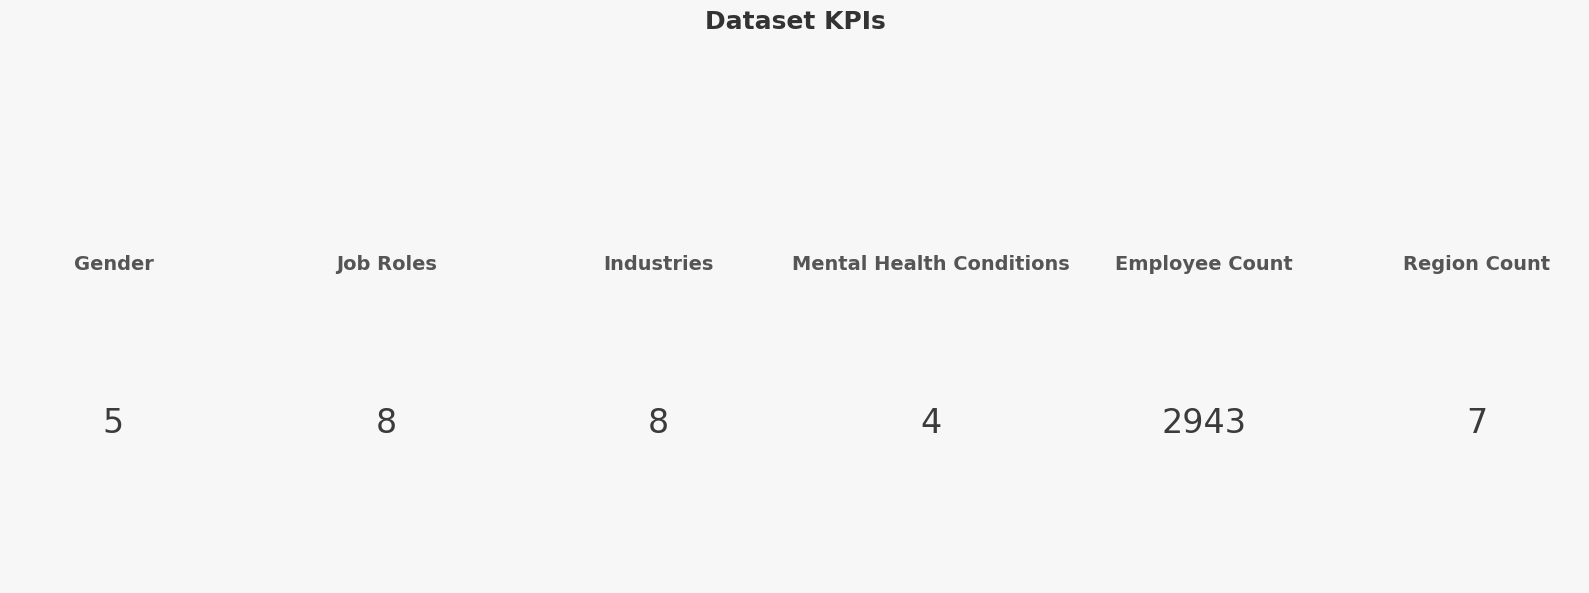

In [27]:
# Visualising KPIs
# Get value counts
gender_counts = data["Gender"].nunique()
job_role_counts = data["Job_Role"].nunique()
industry_counts = data["Industry"].nunique()
mental_health_counts = data["Mental_Health_Condition"].nunique()
employee_counts = data["Employee_ID"].nunique()
region_counts = data["Region"].nunique()

# Titles and values for KPIs
kpi_titles = ['Gender', 'Job Roles', 'Industries', 'Mental Health Conditions', 'Employee Count', 'Region Count']
kpi_values = [gender_counts, job_role_counts, industry_counts, mental_health_counts, employee_counts, region_counts]

# Create a figure
fig, axes = plt.subplots(1, 6, figsize=(16, 6))
fig.patch.set_facecolor('#f7f7f7')  # light gray background

for ax, title, value in zip(axes, kpi_titles, kpi_values):
    ax.set_facecolor('#fdf6f0')  # pastel card color
    ax.axis('off')
    ax.text(0.5, 0.6, title, fontsize=14, ha='center', va='center', color='#555', fontweight='bold')
    ax.text(0.5, 0.3, f"{value}", fontsize=24, ha='center', va='center', color='#3b3b3b')

plt.suptitle("Dataset KPIs", fontsize=18, fontweight='bold', color='#333')
plt.tight_layout()
plt.savefig('Dataset_KPIs.png')
plt.show()


### DETAILS
**Gender**: The dataset contains **3** unique gender identities(some preferred not to disclose their gender('prefer not to say') and others left the space blank('unknown')). This indicates a degree of gender diversity among the respondents, which is crucial for inclusive mental health analysis.

**Job Roles**: With **8** distinct job roles, the dataset spans a broad range of professional positions. This variety allows us to analyze how mental health conditions may differ based on professional responsibilities or work environments.

**Industries**: The data includes individuals from **8** different industries, suggesting the dataset captures insights across multiple economic sectors. This enables sector-specific mental health analysis.

**Mental Health Condition Categories**: There are **4** mental health condition categories reported. This diversity reflects the complexity of mental well-being in the workplace and underscores the importance of tailored mental health support strategies.

This data was recorded from **2943 employees** across **7** different **Regions**, sectors and age groups.

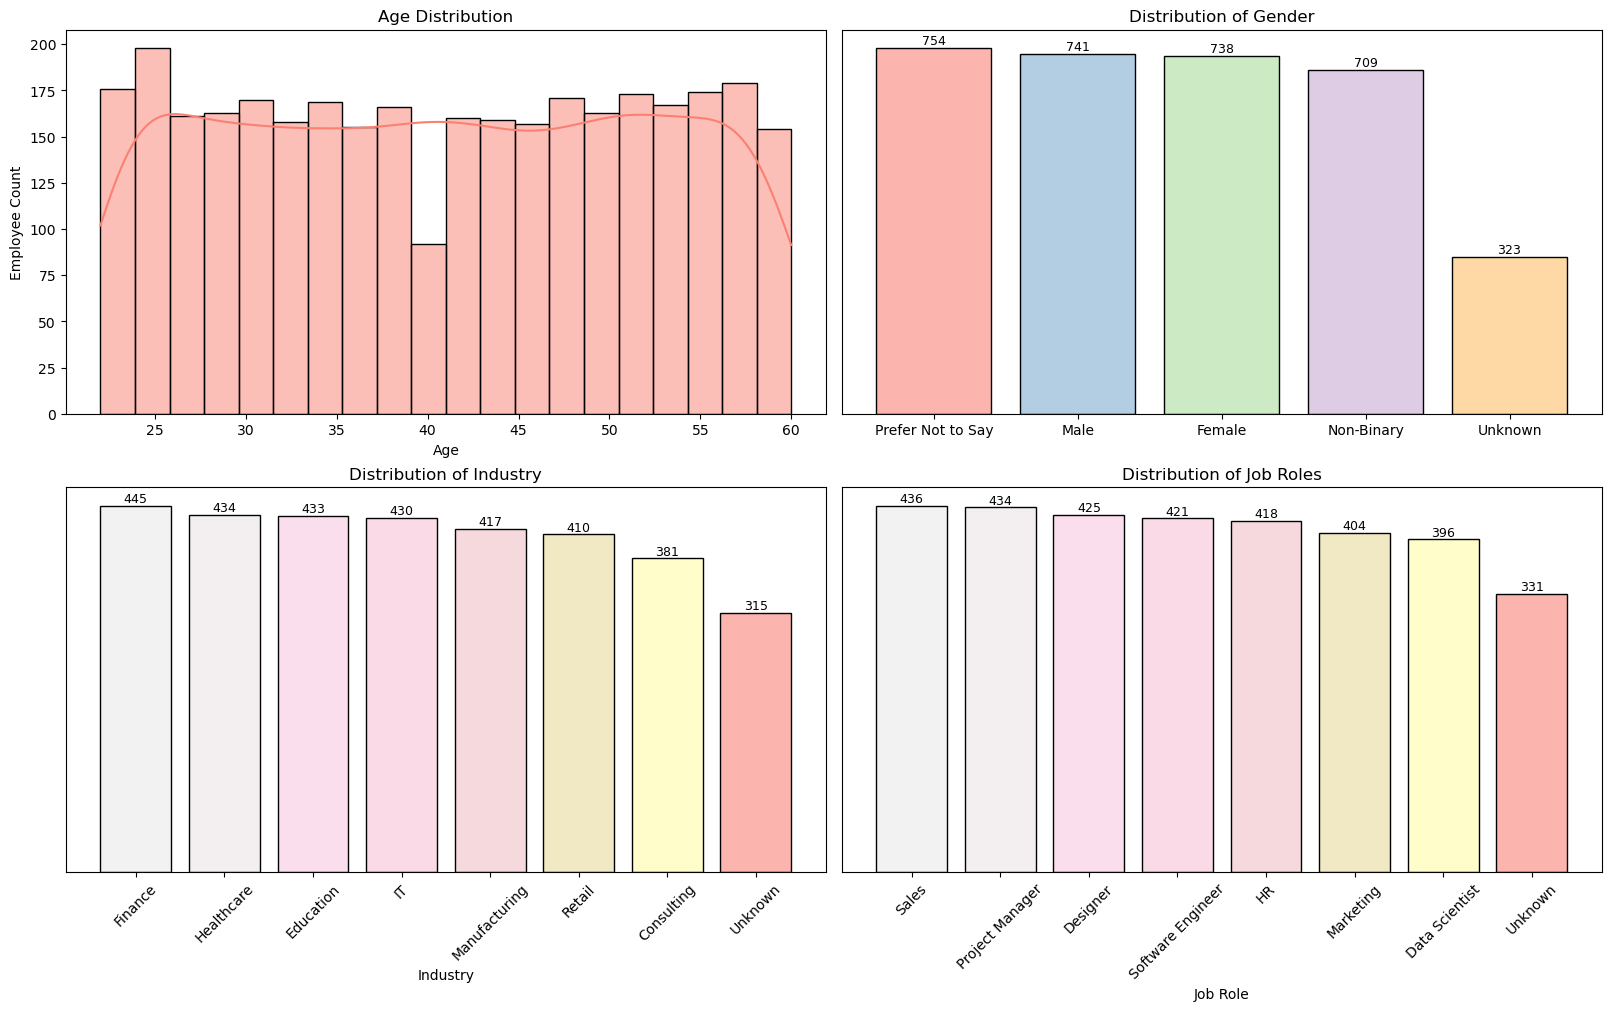

In [29]:
# displaying distribution charts
gender_counts = data['Gender'].value_counts().sort_values(ascending=False)
genders = gender_counts.index.tolist()  # Sorted order for x-ticks
job_counts = data['Job_Role'].value_counts()
industry_counts = data['Industry'].value_counts()

# Custom color for job roles
h_colors = plt.cm.Pastel1.colors
cmap = LinearSegmentedColormap.from_list("custom_gradient", h_colors, N=256)
norm = plt.Normalize(job_counts.min(), job_counts.max())
colors = cmap(norm(job_counts.values))

# Start 2x2 subplots with constrained layout
fig, axs = plt.subplots(2, 2, figsize=(16, 10), constrained_layout=True)

# 1. Age Distribution
sns.histplot(data['Age'], bins=20, kde=True, color='salmon', edgecolor='black', ax=axs[0, 0])
axs[0, 0].set_title('Age Distribution')
axs[0, 0].set_xlabel('Age')
axs[0, 0].set_ylabel('Employee Count')
axs[0, 0].grid(False)

# 2. Gender Distribution
x = np.arange(len(genders))
axs[0, 1].bar(x, gender_counts, color=h_colors, edgecolor='black')
for i, count in enumerate(gender_counts):
    axs[0, 1].text(x[i], count + 1, str(count), ha='center', va='bottom', fontsize=9)
axs[0, 1].set_title('Distribution of Gender')
axs[0, 1].set_xticks(x)
axs[0, 1].set_xticklabels(genders)
axs[0, 1].set_yticks([])
axs[0, 1].set_ylabel('')
axs[0, 1].grid(False)

# 3. Industry Distribution
barss = axs[1, 0].bar(industry_counts.index, industry_counts.values, color=colors, edgecolor='black')
for bar in barss:
    height = bar.get_height()
    axs[1, 0].text(bar.get_x() + bar.get_width() / 2, height + 0.5, int(height),
                  ha='center', va='bottom', fontsize=9)
axs[1, 0].set_title('Distribution of Industry')
axs[1, 0].set_xlabel('Industry')
axs[1, 0].set_ylabel('')
axs[1, 0].tick_params(axis='x', rotation=45)
axs[1, 0].set_yticks([])
axs[1, 0].grid(False)

# 4. Job Role Distribution
bars = axs[1, 1].bar(job_counts.index, job_counts.values, color=colors, edgecolor='black')
for bar in bars:
    height = bar.get_height()
    axs[1, 1].text(bar.get_x() + bar.get_width() / 2, height + 0.5, int(height),
                  ha='center', va='bottom', fontsize=9)
axs[1, 1].set_title('Distribution of Job Roles')
axs[1, 1].set_xlabel('Job Role')
axs[1, 1].set_ylabel('')
axs[1, 1].tick_params(axis='x', rotation=45)
axs[1, 1].set_yticks([])
axs[1, 1].grid(False)

plt.savefig('Distribution_Charts.png', dpi=300, bbox_inches='tight')

plt.show()


### FINDINGS
#### AGE DISTRIBUTION
_The chart above shows the number of employees within each age group. The minimum employee age is 22 and 60 is the maximum age with majority of employees being 25 years old and the minority being 40 years old. The average (mean) age of employees is approximately 41 years. The median age is also close to the mean, suggesting a relatively balanced age spread without extreme outliers._
_The interquartile range (IQR) — the middle 50% — lies roughly between 31 and 41 years, reinforcing the concentration of workers in early to mid-career stages._

#### GENDER DISTRIBUTION
Gender Diversity is Well Represented
The dataset includes a variety of gender identities — Female, Male, Non-Binary, and those who Prefer Not to Say, suggesting that the data collection was inclusive.

High Non-Disclosure Rate
A large number of respondents chose “Prefer Not to Say” or marked “Unknown”, indicating a possible hesitation in disclosing gender identity. This may reflect trust issues or privacy concerns, which could also affect openness around mental health reporting.

Non-Binary and Prefer Not to Say Groups Need More Support
These groups may face unique mental health challenges at work, often linked to underrepresentation, discrimination, or lack of tailored resources. Targeted support and inclusive workplace policies are important.

Balance in Male/Female Responses
Male and Female categories are almost equally represented, enabling a comparative analysis of how mental health conditions differ by binary gender.

#### INDUSTRY DISTRIBUTION
The dataset captures responses from employees across eight industries, with a fairly balanced distribution:

_Finance (445), Healthcare (434), and Education (433) are the top three represented sectors, followed closely by IT (430) and Manufacturing (417)._

_Retail (410) and Consulting (381) also hold a significant share of the data, suggesting a broad representation across service and technical sectors._

_315 responses fall under the "Unknown" category, which may reflect missing or unspecified industry information._

_This balanced distribution indicates the dataset is well-rounded and provides valuable insights across a diverse range of professional sectors._

#### JOB ROLE DISTRIBUTION
The dataset showcases a fairly even distribution of job roles across different departments, highlighting diversity in professional backgrounds:

Sales (436), Project Managers (434), and Designers (425) are the most common roles among respondents, closely followed by Software Engineers (421) and HR professionals (418).

Marketing (404) and Data Scientists (396) also make up a significant portion of the workforce represented.

331 entries fall under the "Unknown" category, possibly indicating unreported or unclassified roles.

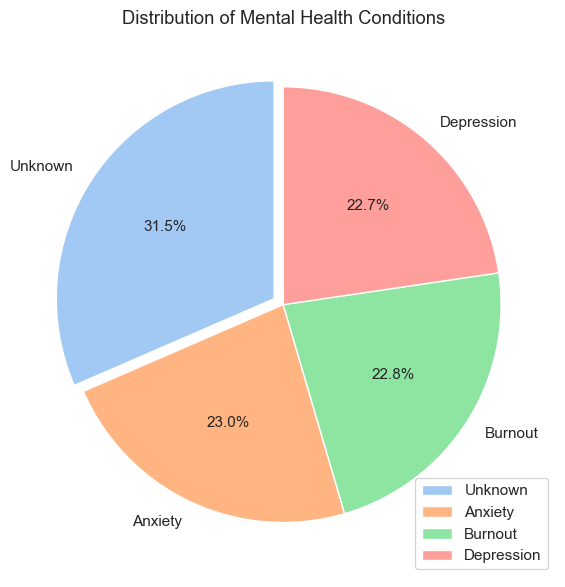

In [34]:
# Mental Health Condition Distribution
# Set style for better aesthetics
sns.set_style('whitegrid')
plt.rcParams.update({'font.size': 11})

# 1. Pie Chart: Distribution of Mental Health Conditions
plt.figure(figsize=(10, 6))
data['Mental_Health_Condition'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    shadow=False,
    explode=[0.05, 0, 0, 0] if len(data['Mental_Health_Condition'].unique()) == 4 else None,  # Slight explode on first slice
    colors=sns.color_palette('pastel')
)
plt.title('Distribution of Mental Health Conditions')
plt.ylabel('')  # Hide ylabel for pie chart
plt.legend()
plt.tight_layout()
plt.savefig('mental_health_pie.png')
plt.show()

### FINDINGS 
1. Unknown Category is the Largest (31.5%)  
   - A significant portion of respondents either chose not to disclose or are unaware of their mental health condition.
   - This could indicate stigma, lack of awareness, or inadequate access to mental health evaluation.

2. Anxiety is the Most Commonly Reported Condition (23.0%)  
   - Among known conditions, anxiety leads, suggesting it's a major mental health concern in remote work settings.

3. Burnout (22.8%) and Depression (22.7%) are Nearly Equal  
   - Both are highly prevalent and closely linked with remote work dynamics such as isolation, blurred work-life boundaries, and overwork.
   - The near-equal distribution suggests that remote work environments may trigger or worsen multiple types of conditions in parallel.


###  INSIGHTS

- There's no single dominant mental health condition — anxiety, depression, and burnout are almost equally reported, reinforcing the need for broad-spectrum mental health interventions.
- The large "Unknown" group suggests there's a gap in mental health literacy or diagnosis, which should be addressed through awareness campaigns and easier access to screening.

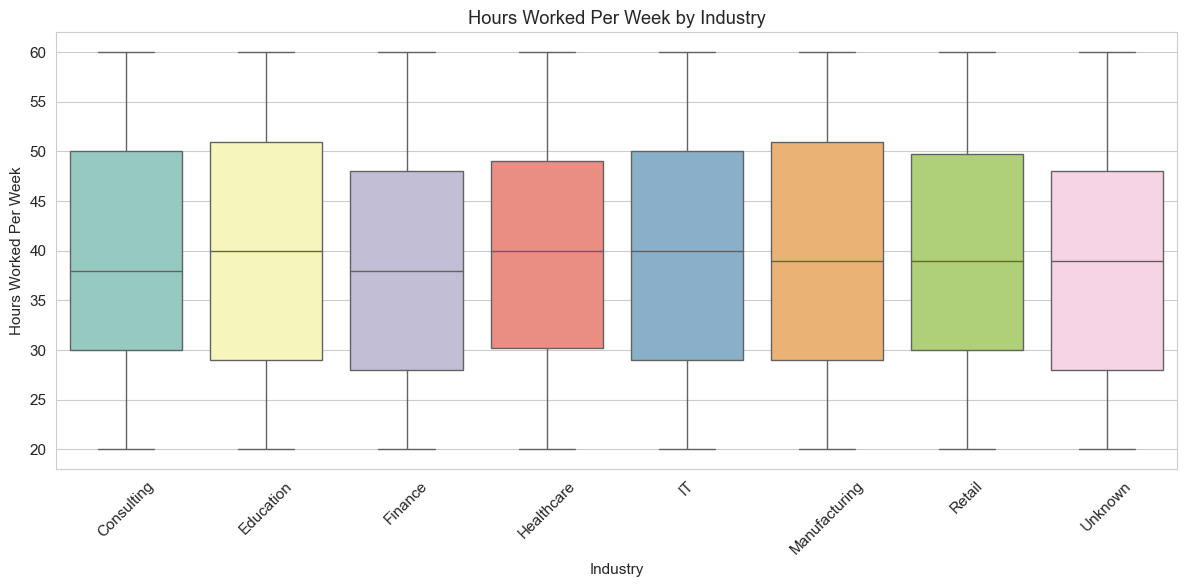

In [36]:
# 3. Boxplot: Hours Worked Per Week by Industry
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=data,
    x='Industry',
    y='Hours_Worked_Per_Week',
    palette='Set3'
)
plt.title('Hours Worked Per Week by Industry')
plt.xlabel('Industry')
plt.ylabel('Hours Worked Per Week')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('hours_industry_boxplot.png')
plt.show()

### FINDINGS
Median Hours Cluster Around 38–40 Across All Industries
   - Most industries show a median close to 40 hours, indicating a general consistency in weekly workload expectations.
Education and Manufacturing Show Slightly Higher Upper Ranges
   - These industries have more people working 50–60 hours, suggesting possible overwork or less structured boundaries.
   - Could lead to higher risk of burnout in those sectors.
Wider Spread in Consulting, Education, and Manufacturing
   - Larger interquartile ranges (IQR) in these industries imply more variability in workload — some individuals working far fewer or far more hours than others.
Retail and Healthcare Appear More Balanced
   - Their distributions are tighter, possibly reflecting more regulated or standardized shifts.


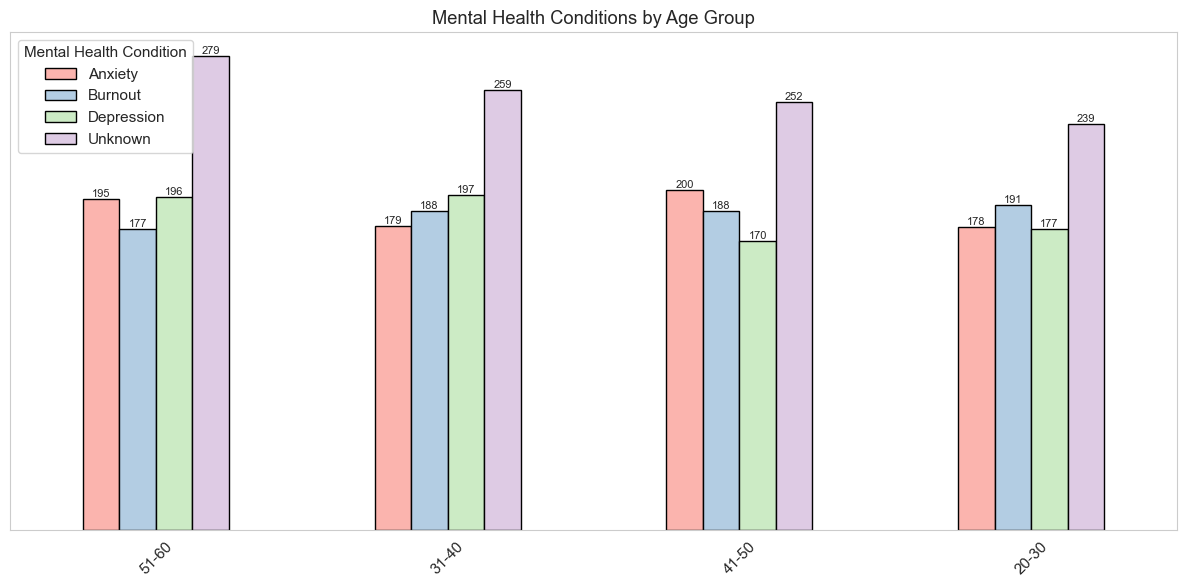

In [38]:
# Mental Health Conditions by Age Group
# Create age groups
data['Age_Group'] = pd.cut(data['Age'], bins=[20, 30, 40, 50, 60, 70], 
                           labels=['20-30', '31-40', '41-50', '51-60', '61-70'])

# Cross-tabulate Age Group vs Mental Health Condition and sort by total
age_mental_health = pd.crosstab(data['Age_Group'], data['Mental_Health_Condition'])
age_mental_health = age_mental_health.loc[age_mental_health.sum(axis=1).sort_values(ascending=False).index]

# Plot grouped bar chart using Pastel1 colormap
colors = plt.cm.Pastel1.colors
ax = age_mental_health.plot(kind='bar', figsize=(12, 6), color=colors, edgecolor='black')

# Customizations
plt.title('Mental Health Conditions by Age Group')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45)
plt.grid(False)
plt.yticks([])
plt.legend(title='Mental Health Condition')
plt.tight_layout()

# Add value labels on each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=8)

plt.savefig('Mental_Health_Conditions_by_Age_Group.png')
plt.show()


### FINDINGS
🔹 Age Group 41–50 Reports the Highest Levels of Anxiety.
    This group shows a notable spike in anxiety (200 cases), higher than any other group.
    This could be due to a balancing act between career peaks and family responsibilities.
     
🔹Burnout Is Fairly Even Across Age Groups.
    Minor differences exist, but burnout levels are consistently high across all age brackets, peaking slightly for 20–30 and 31–40.
    Suggests burnout is a cross-generational issue, potentially more tied to work demands or lack of work-life separation than age.
     
🔹Depression Peaks in Ages 31–40.
    Depression levels rise in this age group (197 cases), possibly linked to mid-career stress or raising young families.
     
🔹The 'Unknown' Category Dominates All Age Groups.
    Every age group has the highest count in 'Unknown', suggesting many respondents may not be aware of or haven’t reported their mental health condition.
    This could indicate stigma, lack of screening, or limited access to mental health evaluation across all demographics.


💡 **RECOMMENDATIONS**

- Age-specific interventions might be needed:
- Younger workers (20–40) may benefit from burnout prevention programs, while 41–50 might need anxiety-related support.
- For hybrid/onsite workers in older groups, anxiety may stem from commuting stress, physical strain, or tech fatigue.
- Remote work might reduce some stress but not eliminate depression or burnout — mental health efforts must still be proactive.


Mental_Health_Condition  Anxiety  Burnout  Depression  Unknown
Region                                                        
AFRICA                       118      115         114      157
ASIA                         111      119         104      140
EUROPE                       106      125         106      162
NORTH AMERICA                115      105          98      148
OCEANIA                      117      105         119      166
SOUTH AMERICA                113      108         123      147
Unknown                       72       67          76      109 



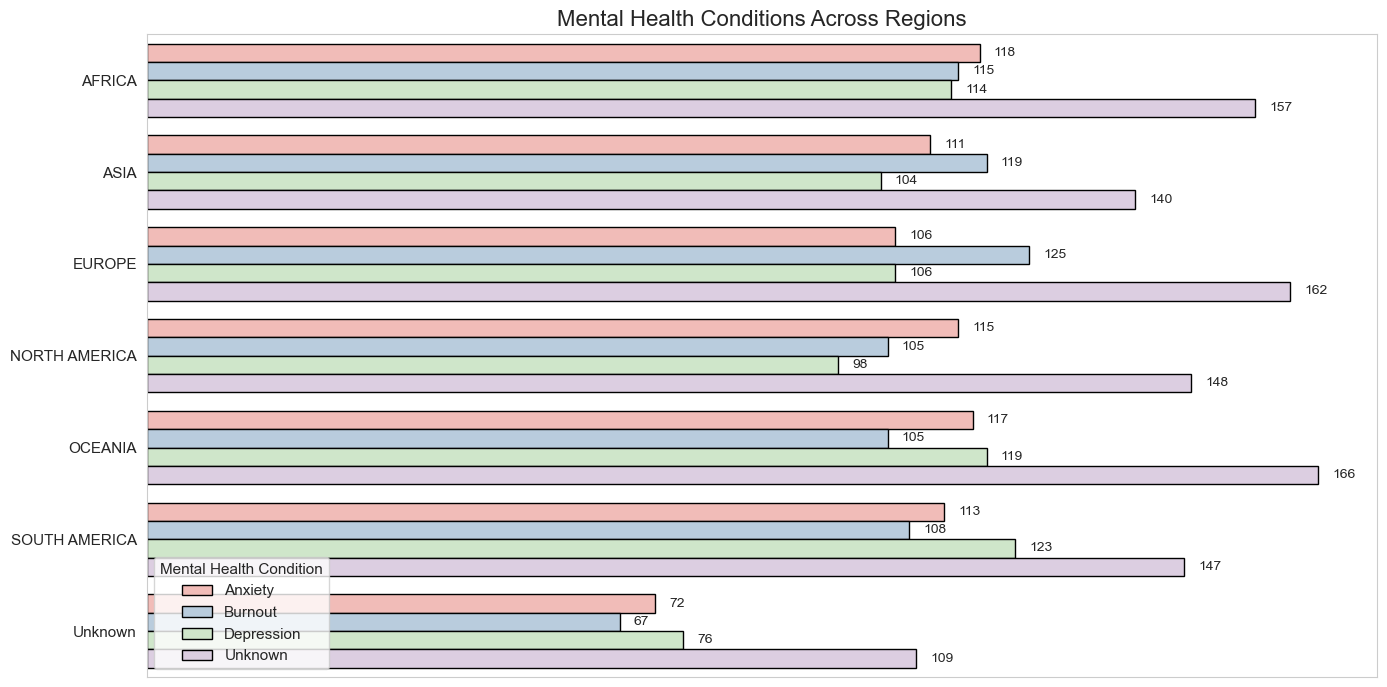

In [40]:
# Mental Health Conditions Across Regions
# Group the data by Region and Mental_Health_Condition, and count occurrences
# Create the summary table
# Create the summary table (cross-tab of Region vs Mental Health Condition)
 # Create the summary table (cross-tab of Region vs Mental Health Condition)
table = data.groupby(['Region', 'Mental_Health_Condition']).size().unstack(fill_value=0)
print(table, '\n')

# Step 1: Sort Region based on total mental health condition counts
region_order = table.sum(axis=1).sort_values(ascending=False).index

# Step 2: Reorder Region column in the original data using the sorted list
data['Region'] = pd.Categorical(data['Region'], categories=region_order, ordered=True)

# Step 3: Plot the countplot
plt.figure(figsize=(14, 7))
mental_health_by_region = sns.countplot(
    data=data,
    y='Region',
    hue='Mental_Health_Condition',
    palette=plt.cm.Pastel1.colors,
    edgecolor='black'
)

# Customizations
plt.title('Mental Health Conditions Across Regions', fontsize=16)
plt.xlabel('')
plt.ylabel('')
plt.legend(title='Mental Health Condition', loc='lower left')
plt.grid(False)
plt.xticks([])

# Add data labels on bars
for p in mental_health_by_region.patches:
    width = p.get_width()
    if width > 0:
        plt.text(width + 2, p.get_y() + p.get_height() / 2, int(width),
                 ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.savefig('Mental_Health_Conditions_Across_Regions.png')
plt.show()


### FINDINGS
🔹 Oceania Shows the Highest Reported Depression Cases (119)
Despite having fewer respondents overall, Oceania records the highest depression counts. This may suggest mental strain related to isolation or economic stressors.

🔹 Europe Leads in Burnout Cases (125)
Europe registers the most burnout cases, which could reflect blurred work-life boundaries, especially in high-performance industries.

🔹 Africa Records the Highest Anxiety (118)
Africa slightly edges other regions in anxiety cases. This might be tied to job security concerns, economic uncertainty, or fast-paced urban environments.

🔹 South America Has High Depression Reports (123)
South America stands out for depression, second only to Oceania. Social challenges, economic strain, or lack of mental health support could contribute.

🔹 Unknown Mental Health Condition Is Highest in Oceania (166)
This may reflect challenges in self-diagnosis, mental health literacy, or reluctance to disclose.

🔹 North America Does Not Lead in Any Condition
Contrary to assumptions, North America shows lower numbers across all conditions compared to other regions — possibly due to smaller representation or better mental health initiatives.

💡 **RECOMMENDATIONS**

Customize Mental Health Programs by Region: Oceania may need targeted support for depression and unknown diagnoses, while Europe should focus on burnout prevention strategies.

Promote Awareness in ‘Unknown’ Categories: High counts in this column across all regions show a need for mental health education, screening, and destigmatization.

Encourage Region-Specific Studies: Different patterns across continents suggest that one-size-fits-all approaches may not work. Data-driven interventions are key.

Invest in Global Peer Support Networks: Especially for remote workers or isolated teams in Oceania, peer check-ins can help address undiagnosed conditions.

Mental_Health_Condition  Anxiety  Burnout  Depression  Unknown
Industry                                                      
Consulting                    91       84          84      122
Education                    104       94          95      140
Finance                       97      105         106      137
Healthcare                    92       95         105      142
IT                           108      106          90      126
Manufacturing                104       89          80      144
Retail                        91       89          99      131
Unknown                       65       82          81       87


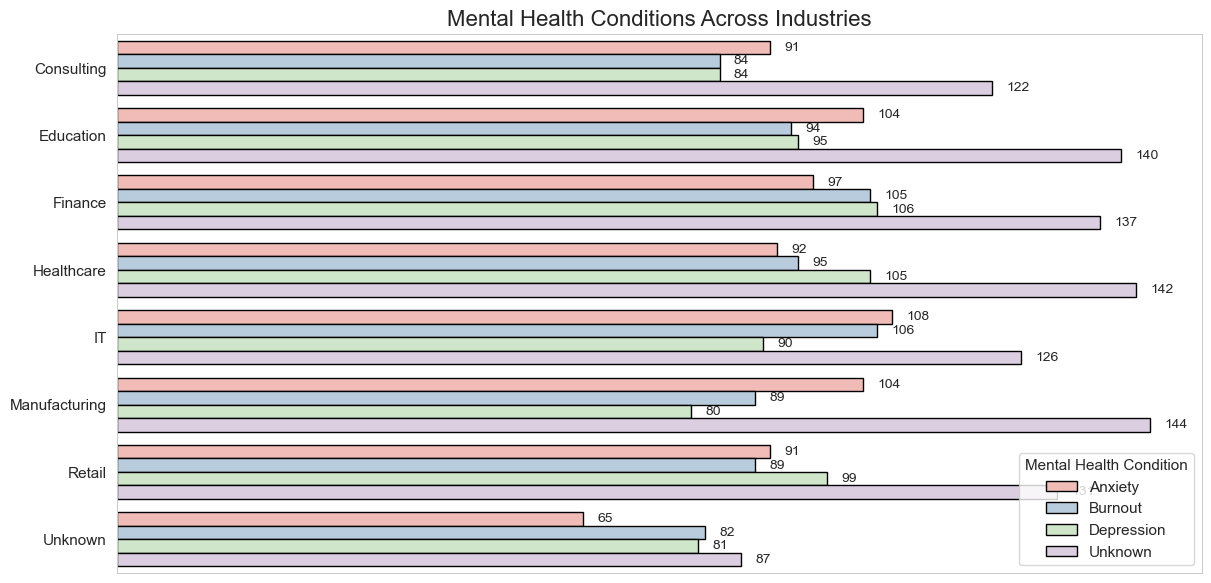

In [42]:
# Mental Health Conditions Across Industries
# Get the table of counts: rows = Industry, columns = Mental_Health_Condition
industry_mental_health_table = data.pivot_table(
    index='Industry',
    columns='Mental_Health_Condition',
    aggfunc='size',
    fill_value=0  # Fill missing combinations with 0
)

# Display the resulting table
print(industry_mental_health_table)


# Plot the countplot
plt.figure(figsize=(14, 7))
mental_health_by_industry = sns.countplot(
    data=data,
    y='Industry',
    hue='Mental_Health_Condition',
    palette=plt.cm.Pastel1.colors,  # Use Pastel1 colormap for color gradient
    edgecolor='black'
)

# Customizations
plt.title('Mental Health Conditions Across Industries', fontsize=16)
plt.xlabel('')
plt.ylabel('')
plt.legend(title='Mental Health Condition')

# Remove grid lines
plt.grid(False)

# Remove y-axis labels and add data labels on the bars
# Remove y-axis ticks
plt.xticks([])

# Add data labels farther from the bars
for p in mental_health_by_industry.patches:
    width = p.get_width()
    if width > 0:
        plt.text(width + 2,  # push the label farther to the right
                 p.get_y() + p.get_height() / 2,  # vertically center
                 int(width),
                 ha='left',  # align text to the left so it doesn't overlap bar
                 va='center',
                 fontsize=10)
plt.savefig('Mental_Health_Conditions_Across_Industries.png')
plt.show()

### FINDINGS
 Education and Healthcare Report High Mental Health Conditions
These sectors consistently show elevated numbers across all conditions. For instance, Education leads with 104 (Anxiety), 94 (Burnout), 95 (Depression), and 140 (Unknown), while Healthcare follows closely. These findings may reflect emotionally demanding roles, high workloads, and under-resourced systems.

 Finance and IT Are Stress-Heavy Sectors
Both industries report significant levels, especially in Burnout (Finance: 105, IT: 106) and Anxiety (Finance: 97, IT: 108). This could relate to high performance pressure, deadlines, and fast-paced environments.

 Retail and Manufacturing Are Not Far Behind
Retail shows relatively high Depression (99) and Unknown (131) cases, hinting at overlooked mental health burdens in customer-facing or physically demanding roles. Manufacturing’s mental health issues may be under-discussed, despite showing moderate numbers.

 Consulting Shows Consistently Moderate-High Levels
With numbers like 91 (Anxiety) and 122 (Unknown), consulting appears to face balanced but significant mental health concerns, likely tied to travel, client stress, and high expectations.

 ‘Unknown’ Industry Indicates Reporting Gaps
A high number of mental health conditions are found in the “Unknown” industry group, especially Burnout (82) and Depression (81) — suggesting data limitations or self-employed/unclassified roles.

 **RECOMMENDATIONS**

 Target Mental Health Resources to High-Risk Industries
Tailored interventions should be prioritized for Education, Healthcare, Finance, and IT, where mental health conditions are more pronounced.

 Create Sector-Specific Programs
For example, educators may benefit from emotional support groups and workload balancing, while finance/IT professionals might need digital detox programs and stress management workshops.

 Enhance Reporting and Support in ‘Unknown’ and Overlooked Sectors
Improve data collection and mental health support in Retail, Manufacturing, and the “Unknown” group — potentially including gig workers, freelancers, or underrepresented job sectors.

 Promote Work-Life Balance Across All Sectors
Cross-industry initiatives can help normalize mental health conversations and embed well-being into organizational culture.

Mental_Health_Condition  Anxiety  Burnout  Depression  Unknown
Job_Role                                                      
Data Scientist                83      106          90      117
Designer                      86      100          99      140
HR                            94      106          86      132
Marketing                     85       85          82      152
Project Manager              106      100          94      134
Sales                        114       92         107      123
Software Engineer            101       91         105      124
Unknown                       83       64          77      107


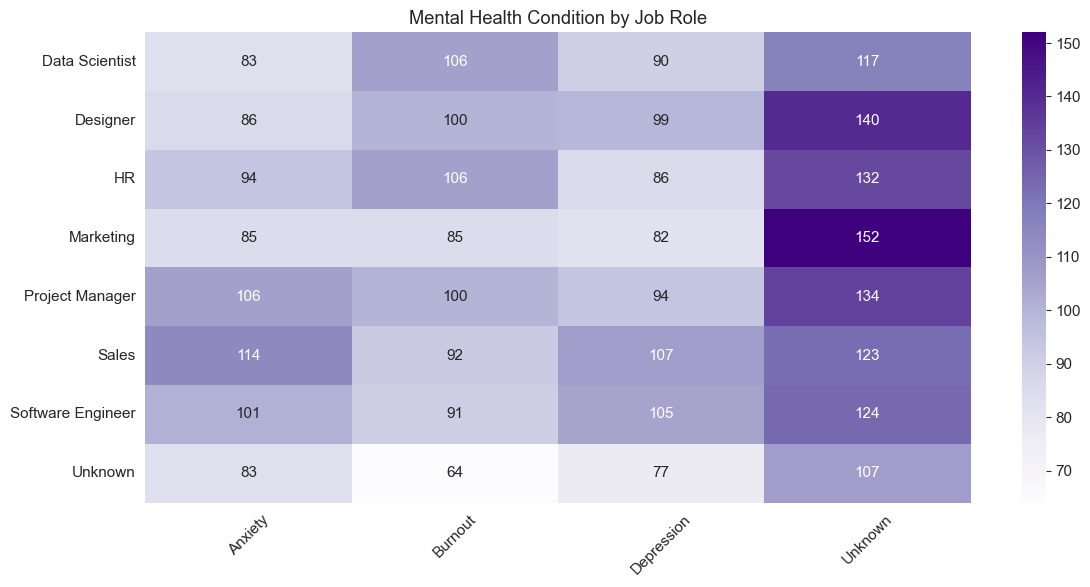

In [44]:
# Job Roles and Mental Health 
# Group the data
mh_by_role = data.groupby(['Job_Role', 'Mental_Health_Condition']).size().unstack(fill_value=0)

# Display the table
print(mh_by_role)

# VISUAL
# heat map visualization
mh_by_role = data.groupby(['Job_Role', 'Mental_Health_Condition']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(mh_by_role, cmap="Purples", annot=True, fmt="d")
plt.title('Mental Health Condition by Job Role')
plt.xticks(rotation=45)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.savefig('job_roles_vs_mentalhealth_heatmap.jpeg')
plt.show()

### FINDINGS
 Sales and Project Management Face Intense Mental Health Strain
Sales reports the highest Anxiety (114) and Depression (107), while Project Managers also show elevated Anxiety (106) and Burnout (100). These roles likely involve high pressure, strict deadlines, and performance-based stressors.

 Data Scientists and HR Experience Notable Burnout
Both Data Scientists and HR professionals report Burnout levels of 106, suggesting these roles may involve emotionally or cognitively draining tasks, possibly coupled with limited mental health resources or support systems.

 Designers and Software Engineers Show High Depression Levels
Designers (99) and Software Engineers (105) show elevated Depression levels. Creative pressure, isolation in remote work, and long coding hours may contribute to this.

 Marketing Has the Highest Reporting Gap
Marketing shows the highest number of “Unknown” responses (152), followed by Designers (140) and Project Managers (134). This suggests a significant data gap and possibly a lack of mental health awareness or willingness to report in these roles.

 ‘Unknown’ Job Role Indicates Unclassified Workers
This group has the lowest reported values across all categories, especially Burnout (64) and Depression (77), but still shows a considerable number of cases — implying underreported or neglected mental health issues, potentially among freelancers or gig workers.

 **RECOMMENDATIONS**

Prioritize Mental Health Interventions for Sales, Project Management, and Tech Roles
Introduce targeted initiatives such as performance pressure relief workshops, regular mental health check-ins, and mental resilience programs in high-pressure roles.

 Develop Role-Specific Burnout Prevention Strategies
For HR and Data Scientists, introduce initiatives like mental wellness retreats, clearer work boundaries, flexible work hours, and access to counseling services.

 Address Mental Health in Creative and Technical Fields
Implement programs that support creative confidence, manage work expectations, and provide ergonomic and mindfulness solutions for Designers and Engineers alike.

 Strengthen Reporting Systems and Encourage Openness
Create safe channels for mental health disclosure, especially in Marketing and “Unknown” roles. Normalize the use of anonymous surveys and feedback mechanisms.

 Recognize and Include Freelancers and Gig Workers
Policies and mental health resources must be extended to contract-based workers who may fall under the “Unknown” category, ensuring inclusive support across employment types.

 Embed Mental Health into Workplace Culture Across All Roles
Normalize mental health discussions, promote empathy-driven leadership, and implement workplace well-being programs that cut across all job roles.

Access_to_Mental_Health_Resources   No  Unknown  Yes
Job_Role                                            
Data Scientist                     169       41  186
Designer                           186       44  195
HR                                 190       41  187
Marketing                          180       36  188
Project Manager                    202       50  182
Sales                              194       47  195
Software Engineer                  203       47  171
Unknown                            161       31  139


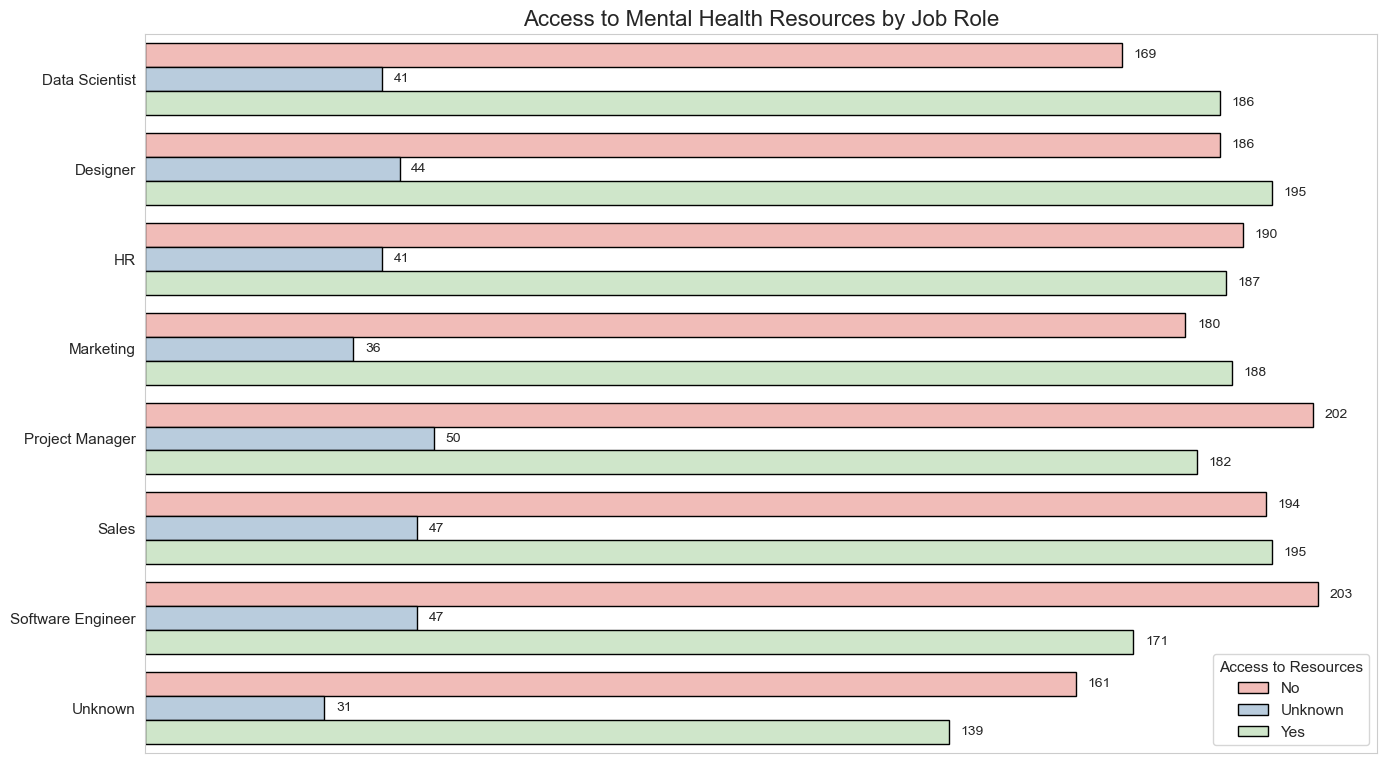

In [46]:
# Mental Health Resource Access by Job Role
# Get the table of counts: rows = Job_Role, columns = Access_to_Mental_Health_Resources
job_Access_to_Mental_Health_Resources_table = data.pivot_table(
    index='Job_Role',
    columns='Access_to_Mental_Health_Resources',
    aggfunc='size',
    fill_value=0  # Fill missing combinations with 0
)

# Display the resulting table
print(job_Access_to_Mental_Health_Resources_table)

plt.figure(figsize=(14, 8))
resources_by_role = sns.countplot(
    data=data,
    y='Job_Role',
    hue='Access_to_Mental_Health_Resources',
    palette= plt.cm.Pastel1.colors, edgecolor='black'
)
plt.title('Access to Mental Health Resources by Job Role', fontsize=16)
plt.xlabel('')
plt.ylabel('')
plt.legend(title='Access to Resources')
plt.tight_layout()

# Remove grid lines
plt.grid(False)

# Remove y-axis labels and add data labels on the bars
# Remove y-axis ticks
plt.xticks([])

# Add data labels farther from the bars
for p in resources_by_role.patches:
    width = p.get_width()
    if width > 0:
        plt.text(width + 2,  # push the label farther to the right
                 p.get_y() + p.get_height() / 2,  # vertically center
                 int(width),
                 ha='left',  # align text to the left so it doesn't overlap bar
                 va='center',
                 fontsize=10)
plt.savefig('Mental_Health_Resources_Job_Role.png')
plt.show()



### FINDINGS
 Limited Access in Project Management and Software Engineering
Project Managers (202) and Software Engineers (203) report the highest number of people without access to mental health resources. This could indicate organizational neglect or lack of awareness in high-stress, deadline-driven roles.

 HR and Sales Show Balanced Yet Concerning Trends
HR (190 No / 187 Yes) and Sales (194 No / 195 Yes) have relatively balanced access vs. lack of access, but still present high absolute numbers in both categories, suggesting room for improvement in resource dissemination.

 High Resource Access Does Not Always Translate to Utilization
Roles like Designers (195 Yes) and Data Scientists (186 Yes) report high access, yet these professions also show significant mental health conditions in the earlier dataset. This suggests access alone is not sufficient without engagement, awareness, and cultural support.

 Marketing Shows the Lowest "Unknown" Reporting
Marketing professionals have the lowest "Unknown" count (36), suggesting more clarity or better reporting structures about mental health resource availability in this role compared to others.

 ‘Unknown’ Job Role Again Highlights Unclassified Groups
The “Unknown” group has relatively low access (139 Yes) and high “No” responses (161), reflecting the ongoing vulnerability of freelance, gig, or unclassified workers, who may lack organizational support or benefits.

 RECOMMENDATIONS

 Improve Resource Accessibility for Project Managers and Software Engineers
Invest in structured mental health programs tailored to project-heavy and tech-centric teams. These might include mental health days, embedded wellness platforms, and dedicated mental health officers.

 Ensure Utilization Matches Availability
For roles like Designers and Data Scientists, prioritize awareness campaigns, team check-ins, and manager-led encouragement to actually use the mental health resources provided.

 Close Gaps in HR and Sales
Even though HR should be championing workplace wellness, they themselves need more support. Leadership must ensure HR and Sales teams have equal and active access to mental health tools and policies.

 Create Inclusive Systems for Non-Traditional Workers
Ensure access to mental health services for gig workers, freelancers, or those falling into the “Unknown” category by promoting public platforms, community-based resources, or third-party employee assistance programs (EAPs).

 Monitor and Evaluate Resource Usage
Set up feedback mechanisms and periodic surveys to evaluate not just access, but effectiveness. Aim to identify barriers to usage and redesign resources around what employees actually need.

 Embed Mental Health Education into Onboarding and Team Culture
Normalize mental health literacy through onboarding sessions, manager training, and routine conversations. The goal should be a workplace where access = understanding = usage.

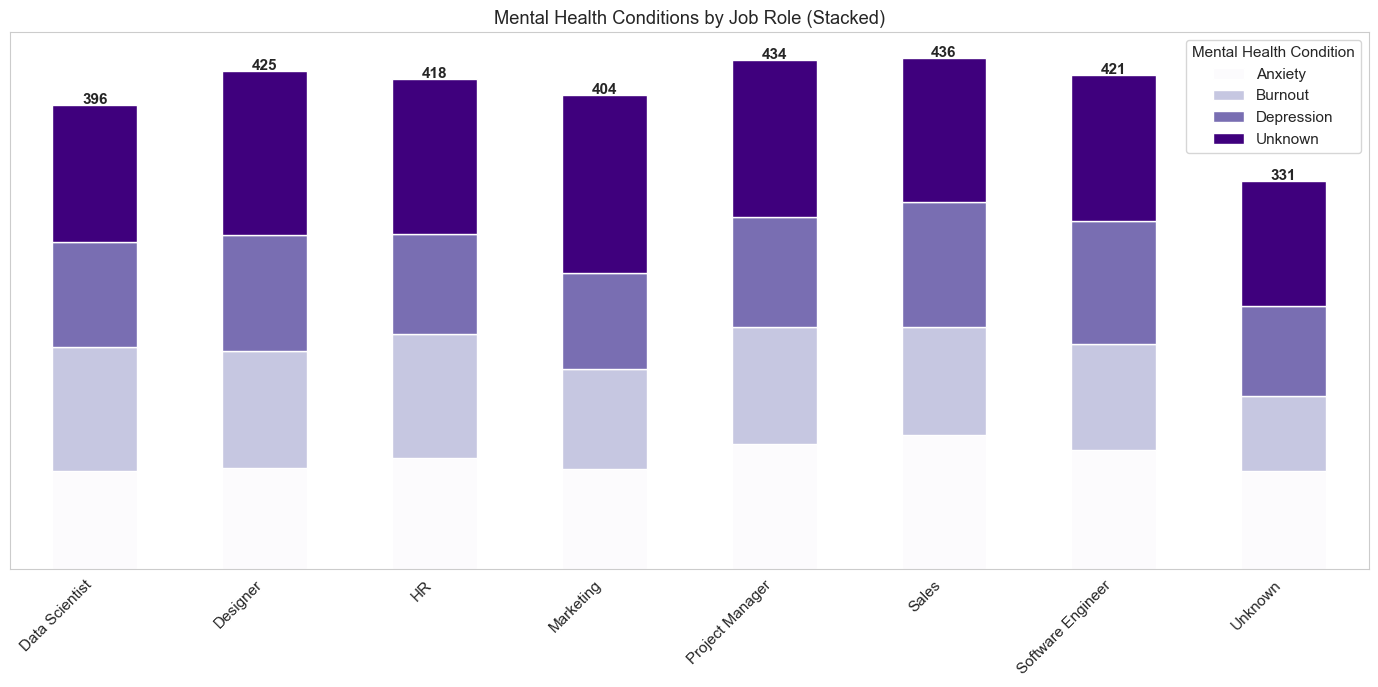

In [48]:
# Mental Health Conditions by Job Role 
mh_by_role = data.groupby(['Job_Role', 'Mental_Health_Condition']).size().unstack(fill_value=0)

# Plotting
ax = mh_by_role.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='Purples')

# Adding data labels on top of each bar (total count per job role)
totals = mh_by_role.sum(axis=1)
for i, total in enumerate(totals):
    ax.text(i, total + 1, str(total), ha='center', fontweight='bold')

plt.title('Mental Health Conditions by Job Role (Stacked)')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45, ha='right')
plt.yticks([])
plt.legend(title='Mental Health Condition')
plt.tight_layout()
plt.grid(False)
plt.savefig('job_roles_vs_mentalhealth_stackedbar.jpeg')
plt.show()


### FINDINGS
 Sales and Project Managers Show the Highest Overall Mental Health Condition Counts
   - Sales (436) and Project Managers (434) have the highest total counts of mental health conditions.
   - This suggests these roles may be more demanding, stressful, or lack mental health support — likely due to pressure to meet targets, deadlines, and constant communication demands.

 Anxiety and Burnout Are Consistently High Across Roles
   - All job roles exhibit similar proportions of Anxiety and Burnout, indicating that mental fatigue is a widespread issue regardless of role.
   - Even creative (Designer) and technical (Software Engineer, Data Scientist) roles are not exempt — likely due to tight timelines, high performance expectations, or isolation (especially in remote settings).

 HR and Marketing Roles Have Moderate but Balanced Counts
   - HR (418) and Marketing (404) roles have moderate total counts with fairly even distributions among the mental health categories.
   - HR may deal with emotional burdens due to employee relations, while Marketing may face high workload variability and creativity pressure.

 ‘Unknown’ Mental Health Condition Is Significant in All Roles
   - Like previous charts, the ‘Unknown’ category is large across roles, especially prominent in Designers and Marketing.
   - This likely reflects underdiagnosis, lack of self-awareness, or unwillingness to disclose mental health status in the workplace.

 Data Scientists Have the Lowest Overall Count (396) Among Known Roles
   - While still substantial, this group shows slightly fewer reports.
   - Possible reasons include more autonomy or flexibility (common in remote work setups), or perhaps lower reporting due to stigma in technical fields.


  **Implications & Recommendations:**

- Tailored mental health programs should be designed by job type:
  - Sales/Project Management: Emphasize stress management, communication boundary training, and burnout prevention.
  - Designers/Engineers: Incorporate creative downtime, flexibility, and mental refresh breaks.
- Companies should encourage mental health disclosure safely, especially where the ‘Unknown’ category is high.
- These findings can help employers build job-role-specific wellness interventions to support employees more effectively.

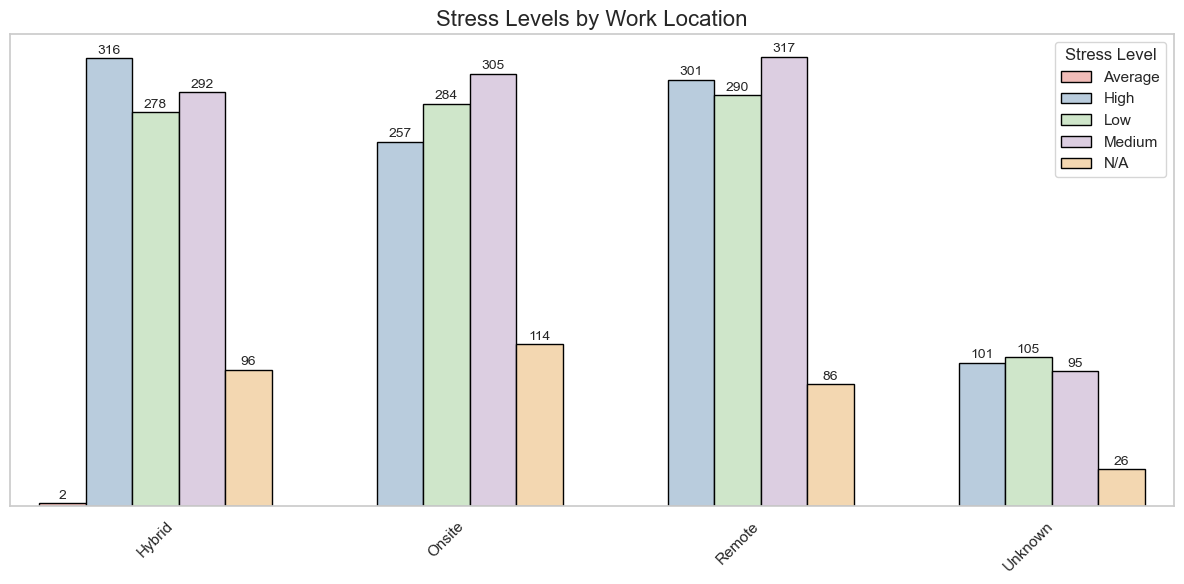

In [50]:
#Stress Levels by Work Location
# Set the aesthetic style of the plots
sns.set(style="whitegrid")
plt.rcParams.update({'font.size': 12})

# 1. Stress Level by Work Location
plt.figure(figsize=(12, 6))

# Custom color gradient similar to Pastel1
colors = plt.cm.Pastel1.colors

# Create the countplot
stress_by_location = sns.countplot(
    data=data, 
    x='Work_Location', 
    hue='Stress_Level',
    palette=colors,  # Use custom color gradient similar to Pastel1
    edgecolor='black'  
)

# Add data labels on top of the bars
for p in stress_by_location.patches:
    height = p.get_height()
    if height > 0:
        plt.text(
            p.get_x() + p.get_width() / 2,
            height + 1,  # increased spacing to avoid overlap
            int(height),
            ha='center',
            va='bottom',
            fontsize=10
        )

# Customizations
plt.title('Stress Levels by Work Location', fontsize=16)
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45)
plt.yticks([])
plt.grid(False)  # Remove grid lines
plt.legend(title='Stress Level')
plt.tight_layout()
plt.savefig('Stress_Levels_by_Work_Location.jpeg')

# Show the plot
plt.show()


## FINDINGS
 Remote Workers Report the Highest 'Medium' Stress Levels
   - With 317 reports, remote workers top the medium stress category.
   - This may indicate that while remote work reduces extreme stress triggers (like commuting), it can still lead to isolation, blurred work-life boundaries, and communication fatigue.

 Hybrid Workers Report the Highest 'High' Stress Levels
   - 316 individuals in hybrid roles report high stress, more than any other group.
   - This suggests that hybrid setups, although flexible, may introduce logistical strain, lack of routine, or dual expectations from both in-office and remote dynamics.

 Onsite Workers Show a Balanced but High Distribution
   - Onsite workers show consistently high numbers across all stress categories:  
     - High: 257  
     - Medium: 305  
     - Low: 284  
   - This balance might indicate varied coping mechanisms and diverse work cultures in physical offices — some find structure helpful, others feel more pressure.

 Remote and Onsite Work Appear to Have Slightly Lower ‘High Stress’ Compared to Hybrid
   - Both Remote (301) and Onsite (257) report fewer high-stress instances than Hybrid (316).
   - This suggests that clarity in work setup (fully remote or fully onsite) might help reduce stress compared to the fluctuating nature of hybrid setups.

 Unknown Work Locations Have the Lowest Total Stress Reports
   - ‘Unknown’ work types naturally show lower values (between 95–105 per stress level), likely due to incomplete or missing data.
   - Still, even here, High and Low stress levels are almost equal, indicating some consistency in stress experiences regardless of location disclosure.

 Low Stress Is Most Prominent Among Remote Workers (290)
   - This confirms that remote work offers relief for some workers, especially in terms of reduced distractions, control over environment, and flexible hours.


 **Insights & Recommendations:**

- Hybrid Work Needs Better Support Systems:
  - Employers should address coordination challenges, reduce context-switching, and clearly define expectations for hybrid workers.
  
- Remote Work Should Prioritize Social Connection and Mental Boundaries:
  - Incorporate virtual check-ins, breaks, and clear work-hour guidelines to reduce isolation and medium-level stress.

- Onsite Roles Should Include Mental Health Resources On-Premise:
  - These employees could benefit from quiet rooms, flexibility in start/end times, and access to mental health professionals.

- Consider designing personalized mental wellness plans based on work type to optimize support and reduce stress.


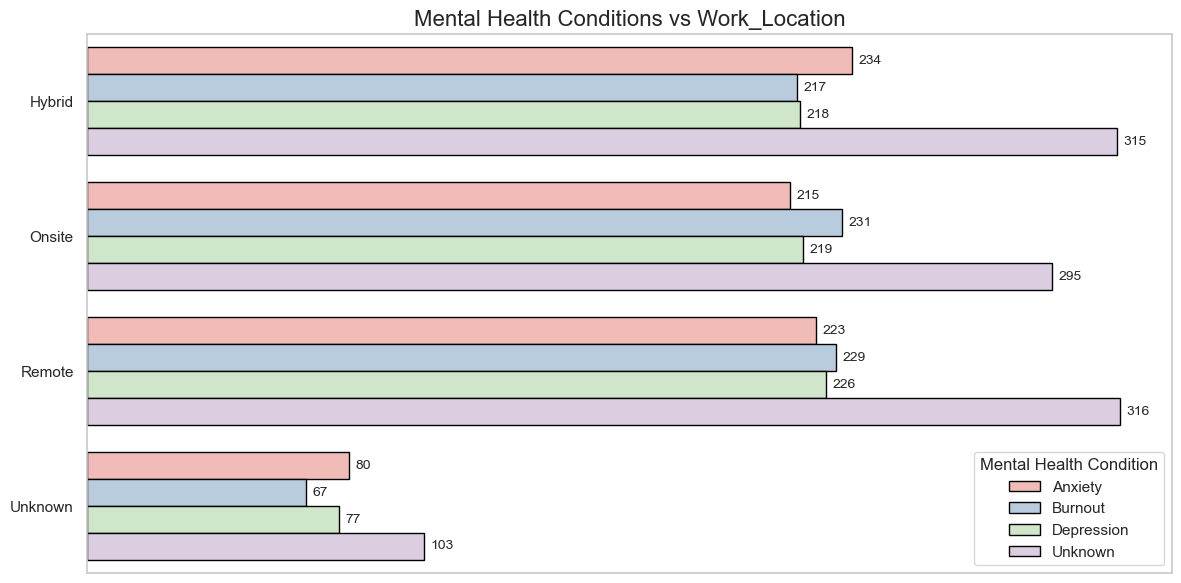

In [52]:
#Mental Health Conditions vs Work_Location
# Plot the countplot
plt.figure(figsize=(14, 7))
mental_health_by_work_location = sns.countplot(
    data=data,
    y='Work_Location',
    hue='Mental_Health_Condition',
    palette=plt.cm.Pastel1.colors,  # Use Pastel1 colormap for color gradient
    edgecolor='black'
)

# Customizations
plt.title('Mental Health Conditions vs Work_Location', fontsize=16)
plt.xlabel('')
plt.ylabel('')
plt.legend(title='Mental Health Condition')

# Remove grid lines
plt.grid(False)

# Remove y-axis labels and add data labels on the bars
# Remove y-axis ticks
plt.xticks([])

# Add data labels farther from the bars
for p in mental_health_by_work_location.patches:
    width = p.get_width()
    if width > 0:
        plt.text(width + 2,  # push the label farther to the right
                 p.get_y() + p.get_height() / 2,  # vertically center
                 int(width),
                 ha='left',  # align text to the left so it doesn't overlap bar
                 va='center',
                 fontsize=10)
plt.savefig('Mental Health Conditions vs Work_Location.png')
plt.show()

## FINDINGS
Remote and Hybrid Workers Report the Most Mental Health Conditions
- Both Remote and Hybrid work arrangements have higher overall counts of mental health conditions.
- Especially noticeable in:
  - Burnout and Depression for Remote
  - Anxiety for Hybrid

Implication:  
Even though remote/hybrid work provides flexibility, it may also increase stressors like isolation, digital fatigue, or blurred work-life boundaries.



Onsite Workers Report Slightly Fewer Issues
- Onsite employees report slightly fewer cases of Anxiety and Depression than remote or hybrid workers.
- Burnout still appears to be significant.

Implication:  
In-person work might offer more structure and social interaction, potentially buffering certain mental health struggles.

---

Unknown Category is Large — Indicates Data Gaps
- A surprisingly high number of "Unknown" mental health conditions across all work locations.
- Suggests:
  - Some employees may not feel comfortable disclosing
  - Possible lack of awareness or diagnosis
  - Data collection or survey design limitations

Actionable Insight:  
Improving transparency, trust, or anonymous reporting mechanisms may help reduce this ambiguity.

---

Anxiety and Burnout Are Consistently High
- Across all work types, Anxiety and Burnout appear to be the most frequently reported issues.
- The difference between work types is more in volume than condition type.

 Implication:  
Stress and emotional exhaustion are cross-cutting issues, likely tied to workload, expectations, and digital pressures.

---

###  Comparative Insights
| Work Location | Top Mental Health Issue |
|---------------|--------------------------|
| Remote        | Burnout & Unknown        |
| Hybrid        | Anxiety                  |
| Onsite        | Burnout                  |
| Unknown       | Unknown (ironically high) |


###  Recommendations Based on the Chart
- Remote/Hybrid Workers: Prioritize mental health check-ins, reduce virtual meeting overload, encourage healthy routines.
- Onsite Workers: Monitor for signs of burnout even if they appear less anxious.
- Across the Board: Invest in mental health literacy, normalize seeking help, and gather clearer data.

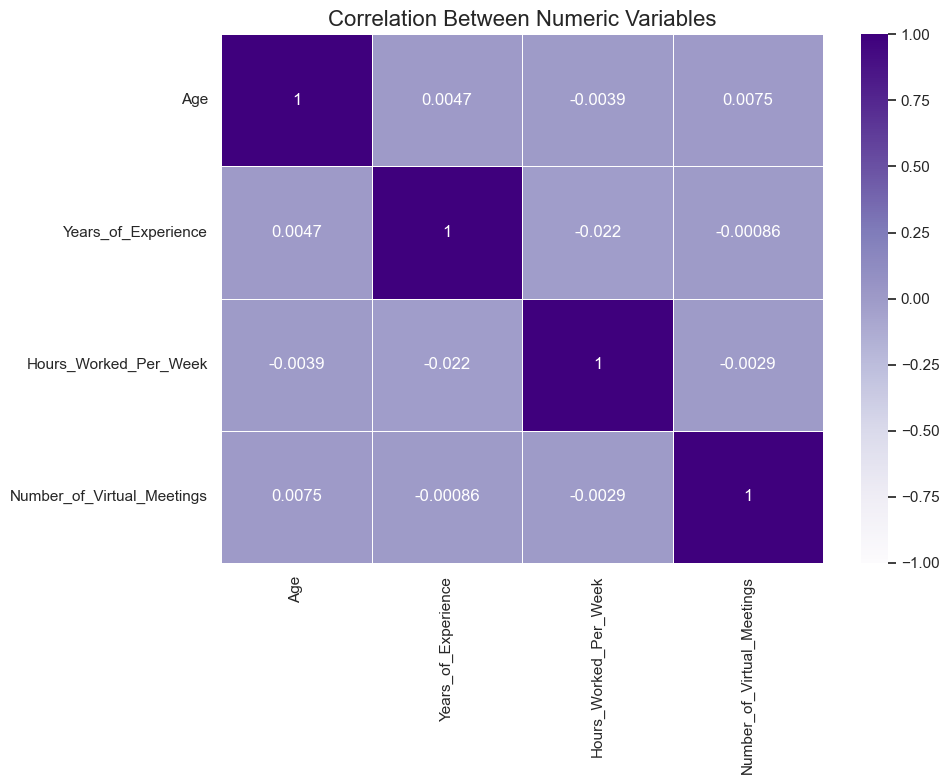

In [54]:
# 4. Correlation Heatmap of Numeric Variables
# Select all numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Plot heatmap
plt.figure(figsize=(10, 8))
correlation = sns.heatmap(
    numeric_data.corr(),
    annot=True,
    cmap='Purples',
    vmin=-1,
    vmax=1,
    linewidths=0.5
)

# Title & layout
plt.title('Correlation Between Numeric Variables', fontsize=16)
plt.tight_layout()
plt.savefig('Correlation_Between_Numeric_Variables.png')
plt.show()


##  FINDINGS
Age vs. Other Variables
   - Correlation with:
     - Years of Experience: 0.0047  
     - Productivity: -0.0019  
     - Hours Worked Per Week: -0.0039  
   -  Insight: Surprisingly, Age has virtually no correlation with work hours, experience, or productivity. This may indicate age diversity in job roles or work styles.

Years of Experience
   - Weakest correlation with:
     - Productivity: -0.0061  
     - Meetings: -0.00086  
   - Insight: Experience does not seem to influence productivity or the number of virtual meetings, which may highlight the non-linear relationship between skill, efficiency, and meeting load.

Hours Worked Per Week
   - Correlation with:
     - Productivity: -0.0094  
     - Virtual Meetings: -0.0029  
   - Insight: More working hours do not lead to higher productivity, and may even slightly reduce it—reinforcing the idea that overwork can lead to burnout or inefficiency.

Number of Virtual Meetings
   - Correlation with:
     - Productivity: -0.02  
     - Hours Worked: -0.0029  
   - Insight: More meetings are slightly negatively associated with productivity, implying that excessive meetings might hinder deep work.

Productivity vs. Balance and Other Factors
   - Although Balance_Numeric isn't displayed in the matrix fully (missing data), we can already see:
     - Productivity doesn't positively correlate with any other numeric variable.
     - Insight: Productivity might depend more on qualitative factors (e.g., work culture, support systems, or mental well-being) than on the quantitative ones captured here.


 **Insights & Suggestions:**

- Quantitative factors alone are insufficient to explain well-being or productivity. This highlights the importance of:
  - Collecting qualitative feedback (like satisfaction surveys or mood tracking).
  - Introducing sentiment analysis or text-based responses into future surveys.

- The weak correlations may also reflect a highly diverse workforce where individual experiences vary greatly, emphasizing the need for personalized wellness strategies.

- You might explore non-linear relationships or clustering techniques next to uncover deeper trends that correlation alone cannot capture.


In [56]:
data

Employee_ID  Age             Gender           Job_Role    Industry  \
0        EMP0001   32            Unknown                 HR     Unknown   
1        EMP0002   40             Female     Data Scientist          IT   
3        EMP0004   27               Male  Software Engineer     Finance   
4        EMP0005   49               Male              Sales  Consulting   
6        EMP0007   31  Prefer Not to Say              Sales          IT   
...          ...  ...                ...                ...         ...   
4990     EMP4991   58            Unknown    Project Manager  Consulting   
4993     EMP4994   35         Non-Binary          Marketing      Retail   
4996     EMP4997   39             Female              Sales  Healthcare   
4997     EMP4998   42             Female              Sales  Healthcare   
4998     EMP4999   27             Female              Sales  Healthcare   

      Years_of_Experience Work_Location  Hours_Worked_Per_Week  \
0                      13        Hybrid                     47   
1                       3        Remote                     52   
3                      20        Onsite                     32   
4                      32        Onsite                     35   
6                      24        Remote                     51   
...                   ...           ...                    ...   
4990                   10        Onsite                     45   
4993                   12        Hybrid                     32   
4996                   27        Onsite                     48   
4997                   21        Hybrid                     34   
4998                   26        Remote                     58   

      Number_of_Virtual_Meetings Work_Life_Balance_Rating  ...  \
0                              7                      2.0  ...   
1                              4                      N/A  ...   
3                              8                      4.0  ...   
4                             12                      2.0  ...   
6                              7                      N/A  ...   
...                          ...                      ...  ...   
4990                          10                      N/A  ...   
4993                          13                      5.0  ...   
4996                          15                      1.0  ...   
4997                           1                      4.0  ...   
4998                           0                      5.0  ...   

     Mental_Health_Condition Access_to_Mental_Health_Resources  \
0                 Depression                                No   
1                    Anxiety                                No   
3                 Depression                           Unknown   
4                 Depression                           Unknown   
6                    Anxiety                               Yes   
...                      ...                               ...   
4990                 Unknown                           Unknown   
4993                 Unknown                               Yes   
4996                 Unknown                               Yes   
4997                 Burnout                                No   
4998                 Unknown                               Yes   

     Productivity_Change Social_Isolation_Rating  \
0               Decrease                     1.0   
1               Increase                     3.0   
3               Increase                     3.0   
4               Decrease                     3.0   
6               Decrease                     5.0   
...                  ...                     ...   
4990            Increase                     5.0   
4993            Decrease                     2.0   
4996            Decrease                     1.0   
4997            Increase                     3.0   
4998            Increase                     3.0   

     Satisfaction_with_Remote_Work Company_Support_for_Remote_Work  \
0                      Unsatis

In [57]:
# calling out columns
data.columns

Index(['Employee_ID', 'Age', 'Gender', 'Job_Role', 'Industry',
       'Years_of_Experience', 'Work_Location', 'Hours_Worked_Per_Week',
       'Number_of_Virtual_Meetings', 'Work_Life_Balance_Rating',
       'Stress_Level', 'Mental_Health_Condition',
       'Access_to_Mental_Health_Resources', 'Productivity_Change',
       'Social_Isolation_Rating', 'Satisfaction_with_Remote_Work',
       'Company_Support_for_Remote_Work', 'Physical_Activity', 'Sleep_Quality',
       'Region', 'Age_Group'],
      dtype='object')

# MACHINE LEARNING

In [59]:
# checking datatypes
data.dtypes

Employee_ID                            object
Age                                     int32
Gender                               category
Job_Role                             category
Industry                             category
Years_of_Experience                     int64
Work_Location                        category
Hours_Worked_Per_Week                   int64
Number_of_Virtual_Meetings              int64
Work_Life_Balance_Rating             category
Stress_Level                         category
Mental_Health_Condition              category
Access_to_Mental_Health_Resources    category
Productivity_Change                  category
Social_Isolation_Rating              category
Satisfaction_with_Remote_Work          object
Company_Support_for_Remote_Work      category
Physical_Activity                    category
Sleep_Quality                        category
Region                               category
Age_Group                            category
dtype: object

In [60]:
# Encode categorical variables
cat_cols = ['Gender', 'Region', 'Job_Role', 'Industry', 'Work_Location', 'Sleep_Quality', 'Physical_Activity', 'Stress_Level']
label_encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le
    
# Recode Mental_Health_Condition: 1 if any condition, 0 if Unknown
data['Mental_Health_Condition_Binary'] = data['Mental_Health_Condition'].apply(lambda x: 0 if x == 'Unknown' else 1)

df = data[['Age','Years_of_Experience','Gender','Region','Job_Role', 'Sleep_Quality', 'Mental_Health_Condition_Binary']]
df

Age  Years_of_Experience  Gender  Region  Job_Role  Sleep_Quality  \
0      32                   13       4       2         2              1   
1      40                    3       0       1         0              1   
3      27                   20       1       6         6              5   
4      49                   32       1       3         5              0   
6      31                   24       3       1         5              5   
...   ...                  ...     ...     ...       ...            ...   
4990   58                   10       4       6         4              5   
4993   35                   12       2       1         3              1   
4996   39                   27       0       0         5              0   
4997   42                   21       0       6         5              5   
4998   27                   26       0       1         5              0   

      Mental_Health_Condition_Binary  
0                                  1  
1                                  1  
3                                  1  
4                                  1  
6                                  1  
...                              ...  
4990                               0  
4993                               0  
4996                               0  
4997                               1  
4998                               0  

[3265 rows x 7 columns]

In [61]:
df['Mental_Health_Condition_Binary'].value_counts()

Mental_Health_Condition_Binary
1    2236
0    1029
Name: count, dtype: int64

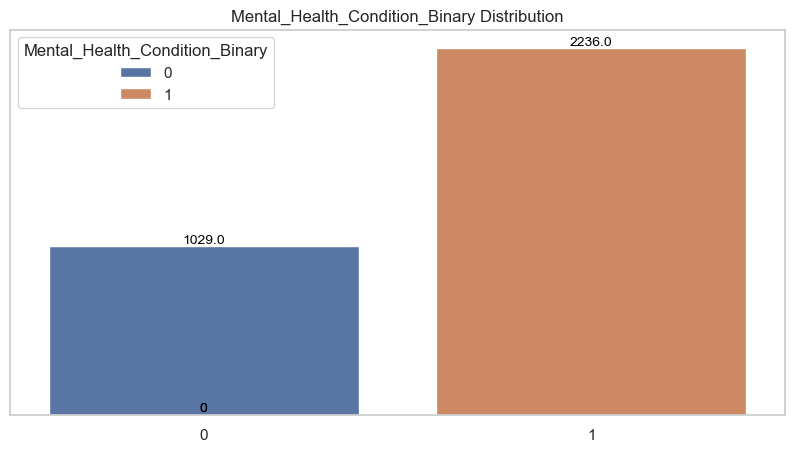

In [62]:
# Exploratory Data Analysis
# Plot
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='Mental_Health_Condition_Binary', hue='Mental_Health_Condition_Binary', data=df)

# Add data labels
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black')

# Customizations
ax.grid(False)                     # Remove grid lines
ax.set_ylabel('')                 # Remove y-axis label
ax.set_yticks([])                 # Remove y-axis ticks
ax.set_xlabel('')                 # Remove x-axis label
plt.title("Mental_Health_Condition_Binary Distribution")

plt.show()

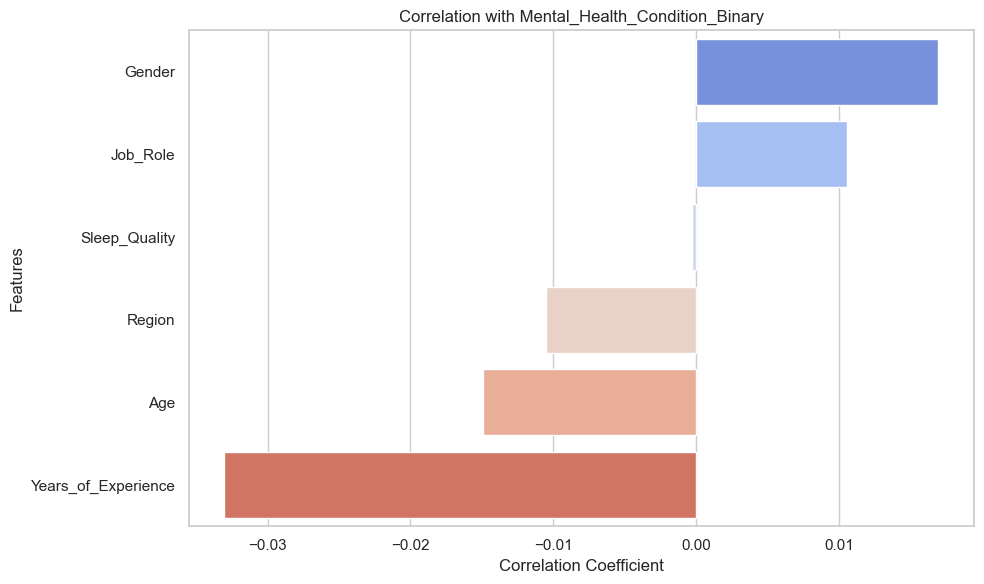

In [63]:
# Correlation with target only
correlation = df.corr()['Mental_Health_Condition_Binary'].sort_values(ascending=False).drop('Mental_Health_Condition_Binary')

plt.figure(figsize=(10,6))
sns.barplot(
    x=correlation.values,
    y=correlation.index,
    hue=correlation.index,
    palette='coolwarm',
    dodge=False,
    legend=False
)
plt.title("Correlation with Mental_Health_Condition_Binary")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

There were generally weak correlations between our data and mental health conditions, however the strongest correlation was from gender and years of experience. Those two columns would be best used for the machine learning process to predict wether a worker has mental health conditions or not.

In [65]:
df_ml = df[['Years_of_Experience','Gender', 'Mental_Health_Condition_Binary']]
df_ml

Years_of_Experience  Gender  Mental_Health_Condition_Binary
0                      13       4                               1
1                       3       0                               1
3                      20       1                               1
4                      32       1                               1
6                      24       3                               1
...                   ...     ...                             ...
4990                   10       4                               0
4993                   12       2                               0
4996                   27       0                               0
4997                   21       0                               1
4998                   26       0                               0

[3265 rows x 3 columns]

In [66]:
# Feature Selection
X = df_ml.drop('Mental_Health_Condition_Binary', axis=1)
y = df_ml['Mental_Health_Condition_Binary']

In [67]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [68]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(max_depth=5, random_state=42)
}

The three models above are going to be used to predict mental health conditions among workers and model with the highest accuracy would be selected.

In [70]:
# Model Training
# Train each model, predict, and evaluate accuracy
# Store results
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)

    # Create DataFrame comparing actual vs predicted
    comparison_df = pd.DataFrame({
        'Actual': y_test.values,
        'Predicted': predictions
    })

    print(f"\n{name} - Accuracy: {accuracy:.4f}")
    print(comparison_df.head(10))  # Show first few comparisons




Logistic Regression - Accuracy: 0.6845
   Actual  Predicted
0       1          1
1       1          1
2       1          1
3       0          1
4       1          1
5       1          1
6       1          1
7       0          1
8       0          1
9       1          1

Random Forest - Accuracy: 0.6417
   Actual  Predicted
0       1          1
1       1          1
2       1          1
3       0          1
4       1          1
5       1          1
6       1          1
7       0          1
8       0          1
9       1          1

Decision Tree - Accuracy: 0.6677
   Actual  Predicted
0       1          1
1       1          1
2       1          1
3       0          1
4       1          1
5       1          1
6       1          1
7       0          1
8       0          1
9       1          1


The model with the best accuracy score was Logistic Regression with a score of 0.6845 (68%). This is above average and not too bad but probably fine the model will give better accuracy results.

In [72]:
from sklearn.metrics import classification_report, confusion_matrix
# 8. Model Tuning
# Define models
models_tune= {
    'Logistic Regression': LogisticRegression(class_weight='balanced'),
    'Random Forest': RandomForestClassifier(random_state=42, class_weight='balanced'),
    'Decision Tree': DecisionTreeClassifier(max_depth=5, random_state=42, class_weight='balanced')
}

# Train each model, predict, and evaluate accuracy
# Store results
results = []

for name, model in models_tune.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)

    # Create DataFrame comparing actual vs predicted
    comparison_df = pd.DataFrame({
        'Actual': y_test.values,
        'Predicted': predictions
    })

    print(f"\n{name} - Accuracy: {accuracy:.4f}")
    print(comparison_df.head(10))  # Show first few comparisons
    print(f"\n{name} - Accuracy: {accuracy:.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, predictions))
    print("Classification Report:")
    print(classification_report(y_test, predictions))



Logistic Regression - Accuracy: 0.5100
   Actual  Predicted
0       1          0
1       1          1
2       1          0
3       0          1
4       1          0
5       1          1
6       1          1
7       0          1
8       0          0
9       1          1

Logistic Regression - Accuracy: 0.5100
Confusion Matrix:
[[106 100]
 [220 227]]
Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.51      0.40       206
           1       0.69      0.51      0.59       447

    accuracy                           0.51       653
   macro avg       0.51      0.51      0.49       653
weighted avg       0.58      0.51      0.53       653


Random Forest - Accuracy: 0.5100
   Actual  Predicted
0       1          1
1       1          1
2       1          0
3       0          1
4       1          0
5       1          0
6       1          0
7       0          0
8       0          1
9       1          0

Random Forest - Accuracy: 0.5100

Fine tuning with the confusion matrix method reduced the accuracy score of all the models.

In [74]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [4, 6, 8],
    'min_samples_split': [2, 5, 10],
}

grid_search = GridSearchCV(RandomForestClassifier(class_weight='balanced', random_state=42),
                           param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Params:", grid_search.best_params_)
best_model = grid_search.best_estimator_

Best Params: {'max_depth': 4, 'min_samples_split': 5, 'n_estimators': 100}


The above output means that GridSearchCV (or RandomizedSearchCV) has found the best combination of hyperparameters for the model RandomForestClassifier based on the performance metric selected.

In [76]:
# Using these optimal parameters to retrain -RandomForestClassifier model:
best_rf = RandomForestClassifier(
    max_depth=4,
    min_samples_split=5,
    n_estimators=100,
    class_weight='balanced',
    random_state=42
)
best_rf.fit(X_train, y_train)

from sklearn.metrics import classification_report

preds = best_rf.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.35      0.47      0.40       206
           1       0.71      0.60      0.65       447

    accuracy                           0.56       653
   macro avg       0.53      0.53      0.52       653
weighted avg       0.60      0.56      0.57       653



Insights:
The model is much better at predicting class 1 than class 0.

Precision and recall are low for class 0, so the model struggles to identify those cases.
Since the model in its raw state gave a higher accuracy score, sticking by that is preffered. 

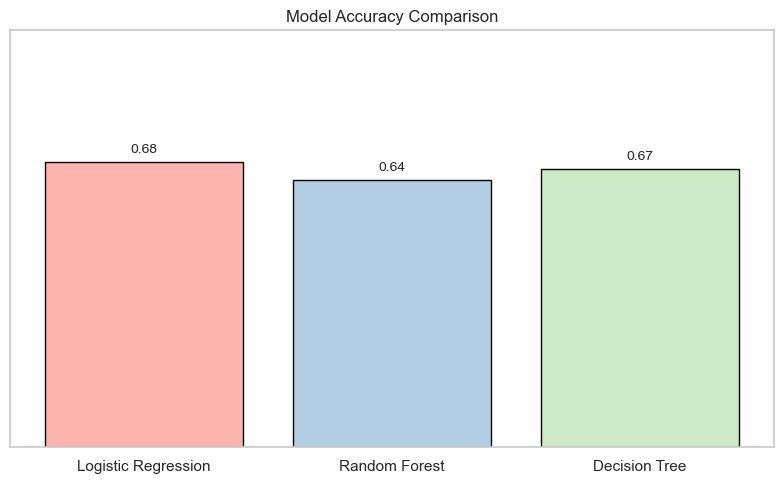

In [78]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Store accuracies
accuracies = {}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    accuracies[name] = acc

# Plot bar chart
plt.figure(figsize=(8, 5))
plt.bar(accuracies.keys(), accuracies.values(), color=plt.cm.Pastel1.colors, edgecolor='black')
plt.title('Model Accuracy Comparison')
plt.ylabel('')
plt.yticks([])
plt.ylim(0, 1)
for i, v in enumerate(accuracies.values()):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.grid(False)
plt.savefig('model_accuracy_comparison.png')  # Optional: Save as PNG
plt.show()
